<p style="text-align:center; font-size:3.3em; color:#AD7D67; line-height:5rem; font-style:italic; font-weight:700;">
    Mission P7 : <br>
    Implémentation d'un modèle de scoring </p>
<p style="text-align:center; font-size:2.8em; color:#9EBEB8; line-height:4rem; font-style:italic; font-weight:700;">
    Partie III - Recherche du "meilleur" algorithme de classification
</p>

<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Rappel-de-l'objectif-du-projet" data-toc-modified-id="Rappel-de-l'objectif-du-projet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Rappel de l'objectif du projet</a></span></li><li><span><a href="#Importation-de-l'Environnement-et-des-Données" data-toc-modified-id="Importation-de-l'Environnement-et-des-Données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importation de l'Environnement et des Données</a></span><ul class="toc-item"><li><span><a href="#Importation-des-librairies" data-toc-modified-id="Importation-des-librairies-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importation des librairies</a></span></li><li><span><a href="#Importation-des-données" data-toc-modified-id="Importation-des-données-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Importation des données</a></span></li></ul></li><li><span><a href="#La-Cible-à-prédire-:-Le-client-est-il-en-difficulté-de-paiement-?" data-toc-modified-id="La-Cible-à-prédire-:-Le-client-est-il-en-difficulté-de-paiement-?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>La Cible à prédire : <em>Le client est-il en difficulté de paiement ?</em></a></span></li><li><span><a href="#Bien-choisir-les-métriques-pour-mesurer-les-performances-des-modèles" data-toc-modified-id="Bien-choisir-les-métriques-pour-mesurer-les-performances-des-modèles-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bien choisir les métriques pour mesurer les performances des modèles</a></span><ul class="toc-item"><li><span><a href="#Accuracy-(précision)" data-toc-modified-id="Accuracy-(précision)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Accuracy (précision)</a></span></li><li><span><a href="#Rappel,-précision-et-F1-score-(Recall-&amp;-Precision)" data-toc-modified-id="Rappel,-précision-et-F1-score-(Recall-&amp;-Precision)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Rappel, précision et F1-score (Recall &amp; Precision)</a></span></li><li><span><a href="#Precision-and-Recall,-vs-probability-threshold" data-toc-modified-id="Precision-and-Recall,-vs-probability-threshold-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Precision and Recall, vs probability threshold</a></span></li><li><span><a href="#Balanced-Accuracy-Weighted" data-toc-modified-id="Balanced-Accuracy-Weighted-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Balanced Accuracy Weighted</a></span></li><li><span><a href="#ROC-AUC" data-toc-modified-id="ROC-AUC-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>ROC-AUC</a></span><ul class="toc-item"><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Logistic Regression</a></span></li></ul></li><li><span><a href="#Precision-Recall-(PR)-Curve-et-AUC-Precision-Recall" data-toc-modified-id="Precision-Recall-(PR)-Curve-et-AUC-Precision-Recall-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Precision-Recall (PR) Curve et AUC Precision Recall</a></span><ul class="toc-item"><li><span><a href="#Précision-Rappel-:-Random-Forest-Classifier" data-toc-modified-id="Précision-Rappel-:-Random-Forest-Classifier-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Précision-Rappel : Random Forest Classifier</a></span></li><li><span><a href="#Précision-Rappel-:-Logistic-Regression" data-toc-modified-id="Précision-Rappel-:-Logistic-Regression-4.6.2"><span class="toc-item-num">4.6.2&nbsp;&nbsp;</span>Précision-Rappel : Logistic Regression</a></span></li></ul></li></ul></li><li><span><a href="#Choix-du-modèle-de-prédiction-avec-Prise-en-compte-du-déséquilibre-des-classes" data-toc-modified-id="Choix-du-modèle-de-prédiction-avec-Prise-en-compte-du-déséquilibre-des-classes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Choix du modèle de prédiction avec Prise en compte du déséquilibre des classes</a></span><ul class="toc-item"><li><span><a href="#Modèles-de-prédiction-de-référence" data-toc-modified-id="Modèles-de-prédiction-de-référence-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Modèles de prédiction de référence</a></span></li><li><span><a href="#Prise-en-compte-du-déséquilibre-des-classes-:-Cost-Sensitive-Learning" data-toc-modified-id="Prise-en-compte-du-déséquilibre-des-classes-:-Cost-Sensitive-Learning-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Prise en compte du déséquilibre des classes : <em>Cost-Sensitive Learning</em></a></span><ul class="toc-item"><li><span><a href="#La-régression-logistique-pondérée" data-toc-modified-id="La-régression-logistique-pondérée-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>La régression logistique pondérée</a></span></li><li><span><a href="#Light-Gradient-Boosted-Machine-(LightGBM)-Ensemble" data-toc-modified-id="Light-Gradient-Boosted-Machine-(LightGBM)-Ensemble-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Light Gradient Boosted Machine (LightGBM) Ensemble</a></span></li></ul></li><li><span><a href="#Prise-en-compte-du-déséquilibre-des-classes-:-Oversampling-Methods" data-toc-modified-id="Prise-en-compte-du-déséquilibre-des-classes-:-Oversampling-Methods-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Prise en compte du déséquilibre des classes : Oversampling Methods</a></span></li></ul></li><li><span><a href="#Optimisation-du-modèle-sélectionné-:-LightGBM" data-toc-modified-id="Optimisation-du-modèle-sélectionné-:-LightGBM-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Optimisation du modèle sélectionné : LightGBM</a></span><ul class="toc-item"><li><span><a href="#Exploration-du-nombre-d'arbres" data-toc-modified-id="Exploration-du-nombre-d'arbres-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Exploration du nombre d'arbres</a></span></li><li><span><a href="#Exploration-de-la-profondeur-des-arbres" data-toc-modified-id="Exploration-de-la-profondeur-des-arbres-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Exploration de la profondeur des arbres</a></span></li><li><span><a href="#Exploration-du-taux-d'apprentissage" data-toc-modified-id="Exploration-du-taux-d'apprentissage-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Exploration du taux d'apprentissage</a></span></li><li><span><a href="#Exploration-du-type-de-boost" data-toc-modified-id="Exploration-du-type-de-boost-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Exploration du type de boost</a></span></li><li><span><a href="#Exploration-des-autres-paramètres" data-toc-modified-id="Exploration-des-autres-paramètres-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Exploration des autres paramètres</a></span></li></ul></li><li><span><a href="#Analyse-de-la-performance-du-modèle" data-toc-modified-id="Analyse-de-la-performance-du-modèle-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Analyse de la performance du modèle</a></span></li></ul></div>

# Rappel de l'objectif du projet

**Attention : le projet a été Mis à jour le vendredi 28 octobre 2022**

La société financière *Prêt à dépenser* propose des **crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.**

1. **Premier Objectif :**
L’entreprise souhaite mettre en oeuvre un outil de scoring crédit qui calcule la probabilité qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un algorithme de classification en s'appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutionsfinancières, etc.).

2. **Second Objectif :**
De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de transparence vis-à-vis des décisions d’octroi de crédit. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner. Prêt à dépenser décide donc de développer un dashboard interactif pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement.

> **Mission** : 
>1. Construire un modèle de scoring qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.
>2. Construire un dashboard interactif à destination des gestionnaires de la relation client permettant d'interpréter les prédictions faites par le modèle, et d’améliorer la connaissance client des chargés de relation client.

**Spécifications du dashboard**
Celui-ci devra contenir au minimum les fonctionnalités suivantes :

* Permettre de visualiser le score et l’interprétation de ce score pour chaque client de façon intelligible pour une personne non experte en data science.
* Permettre de visualiser des informations descriptives relatives à un client (via un système de filtre).
* Permettre de comparer les informations descriptives relatives à un client à l’ensemble des clients ou à un groupe de clients similaires.

**Livrables**

* Le dashboard interactif répondant aux spécifications ci-dessus et l’API de prédiction du score, déployées chacunes sur le cloud.
* Un dossier sur un outil de versioning de code contenant :
    - Le code de la modélisation (du prétraitement à la prédiction)
    - Le code générant le dashboard
* Le code permettant de déployer le modèle sous forme d'API
* Une note méthodologique décrivant :
    - La méthodologie d'entraînement du modèle (2 pages maximum)
    - La fonction coût métier, l'algorithme d'optimisation et la métrique d'évaluation (1 page maximum)
    - L’interprétabilité globale et locale du modèle (1 page maximum)
    - Les limites et les améliorations possibles (1 page maximum)
* Un support de présentation pour la soutenance, détaillant le travail réalisé.

# Importation de l'Environnement et des Données

## Importation des librairies

In [1]:
import warnings
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime

# Visualisation
import seaborn as sns
from xplotter.insights import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 6, 4

sns.set_style("ticks")
sns.color_palette("pink", as_cmap=True)

# Modélisation
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# pour ne pas imprimer les nombres en format scientifique
# et pour imprimer les float avec une précision de 2

#pd.set_option('display.max_columns', 25)
#pd.set_option('display.max_rows', 200)
#pd.set_option('display.max_colwidth', 30)
pd.set_option('display.float_format', '{:,.2f}'.format)

# pour ne pas imprimer les warnings
warnings.filterwarnings('ignore')

# version des librairies utilisées
import sys
print("python version", sys.version)
print("pandas version :", pd.__version__)
print("numpy version :", np.__version__)
print("seaborn version :", sns.__version__)
print("sklearn version :", sklearn.__version__)

python version 3.9.13 | packaged by conda-forge | (main, May 27 2022, 16:50:36) [MSC v.1929 64 bit (AMD64)]
pandas version : 1.5.0
numpy version : 1.21.5
seaborn version : 0.12.0
sklearn version : 1.1.2


## Importation des données

Nous importons les données traitées dans le notebook précédent.

In [3]:
# Les données totales flitrées et analysées
X_test_clean = pd.read_csv('./Data/datasets_intermediaires/X_test_clean.csv')
X_train_clean = pd.read_csv('./Data/datasets_intermediaires/X_train_clean.csv')
y = pd.read_csv('./Data/datasets_intermediaires/y.csv')

X_test_clean.shape, X_train_clean.shape, y.shape

((48744, 28), (307511, 28), (307511, 1))

In [5]:
# Séparation de l'ensemble X_train en 2 sous-ensembles

X_Xtrain, X_valid, y_train, y_valid = train_test_split(X_train_clean, 
                                                       y, stratify=y, test_size=0.3, random_state=101)

X_Xtrain.shape, X_valid.shape

((215257, 28), (92254, 28))

In [6]:
# Standardisation des données

scaler = StandardScaler()
scaler.fit(X_Xtrain)

X_train_sd = scaler.transform(X_Xtrain)
X_valid_sd = scaler.transform(X_valid)

In [7]:
# Transformation des matrices standardisées en dataframe pour avoir les noms des variables

X_train_sd_df = pd.DataFrame(X_train_sd, columns=list(X_Xtrain))
X_valid_sd_df = pd.DataFrame(X_valid_sd, columns=list(X_Xtrain))
y_train_df = pd.DataFrame(y_train)
y_valid_df = pd.DataFrame(y_valid)

In [8]:
X_train_sd_df.shape, X_valid_sd_df.shape, y_train_df.shape, y_valid_df.shape

((215257, 28), (92254, 28), (215257, 1), (92254, 1))

# La Cible à prédire : *Le client est-il en difficulté de paiement ?*

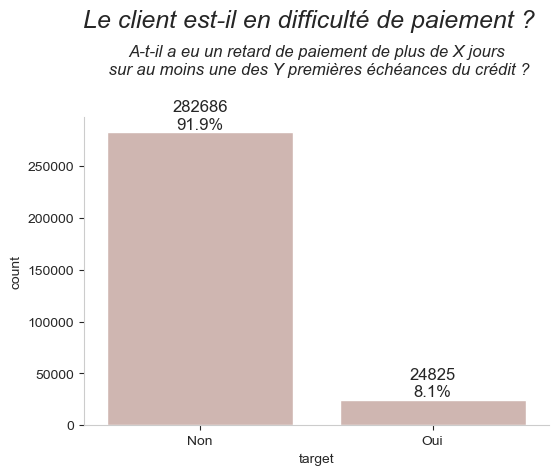

In [9]:
from xplotter.insights import *

colors = ['#d4b3ac']

loan_map = {1 : "Oui",
            0 : "Non"}

fig, ax = plt.subplots(figsize=(6, 4))

plot_countplot(df=y, 
               col='target', 
               label_names=loan_map,
               order=True,
               palette=colors, ax=ax, orient='v', size_labels=12)

plt.suptitle("Le client est-il en difficulté de paiement ?\n",
             y=1.15, fontsize=18, fontstyle='italic')
plt.title("A-t-il a eu un retard de paiement de plus de X jours\n sur au moins une des Y premières échéances du crédit ?\n\n",
           loc="center", fontsize=12, fontstyle='italic')
plt.show()


In [10]:
print(f"imbalance_ratio = {24825 / 282686:.2%}")

imbalance_ratio = 8.78%


In [11]:
print("y_train_series - TARGET")
print(pd.DataFrame({
    "COUNT": y_train_df.value_counts(),
    "RATIO": y_train_df.value_counts() / len(y_train_df) * 100}))

y_train_series - TARGET
         COUNT  RATIO
target               
0       197880  91.93
1        17377   8.07


In [12]:
print("y_valid_series - TARGET")
print(pd.DataFrame({
    "COUNT": y_valid_df.value_counts(),
    "RATIO": y_valid_df.value_counts() / len(y_valid_df) * 100}))

y_valid_series - TARGET
        COUNT  RATIO
target              
0       84806  91.93
1        7448   8.07


**Les clients en difficulté de paiement sont largement sous-représentés (8.1%) dans les données d'entraînement.**

Les méthodes de machine learning classiques ne sont pas toujours adaptées pour la classification sur des données déséquilibrées. Elles donnent souvent de mauvais résultats et, pire encore, elles peuvent induire en erreur avec des scores trop optimistes. Une des causes de ces échecs est que les points de la classe minoritaire sont considérés comme des outliers qui ne contiennent aucune information.

*__Les différentes méthodes pour pallier le déséquilibre des classes__*

On sépare les approches pour contourner le déséquilibre des classes en 2. Les méthodes data-level qui consistent en des transformations opérées sur les données d’entraînement, et les méthodes algorithm-level qui reposent sur des modifications des modèles utilisés pour qu’ils soient plus adaptés à ce problème.

**1. Les Méthodes data-level** <br>
L’idée derrière les approches data level est toujours la même. Il s’agit de transformer les données d’entraînement du modèle pour atténuer le déséquilibre. On va souvent utiliser des techniques d’échantillonnage pour ajouter des représentants dans la classe minoritaire et/ou en retirer de la classe majoritaire.

   - Sous-échantillonnage aléatoire :<br>
La première approche consiste en un sous-échantillonnage de la classe majoritaire. On cherche à réduire la taille de la classe majoritaire pour atténuer le déséquilibre des classes. On va choisir les points à retirer de manière très naïve, simplement en retirant des points de façon aléatoire.<br><br>

   - Tomek links :<br>
Une autre approche de sous-échantillonnage de la classe majoritaire, un peu plus fine cette fois, propose un moyen plus naturel pour choisir les points à éliminer. L’idée est de chercher ceux de la classe majoritaire qui sont assez proches d’un point de la classe minoritaire. Les paires de points identifiées sont appelées tomek links. Dans chaque tomek link on va retirer le point qui appartient à la classe majoritaire.
On peut remarquer au passage que l’identification des tomek links se fait comme l’identification des plus proches voisins dans l’algorithme knn.
Cette approche sera en pratique plus efficace que le sous-échantillonnage aléatoire. Elle va réduire la variance de la classe majoritaire et supprimer d’éventuels outliers, qui peuvent être une grande source de confusion.<br><br>

   - SMOTE & ADASYN: <br>
Les autres approches d’échantillonnage que l’on retrouve souvent sont SMOTE (Synthetic Minority Oversampling Technic ou suréchantillonnage minoritaire synthétique) et ADASYN (ADAptive SYNthetic sampling ou échantillonnage synthétique adaptatif). 
Ce sont des techniques de sur-échantillonnage cette fois. Plutôt que de réduire la taille de la classe majoritaire, on cherche à agrandir celle de la classe minoritaire.
Pour cela, on va sélectionner des points de la classe que l’on souhaite agrandir et en créer de nouveaux. C’est une méthode très semblable à la data augmentation que l’on utilise pour réduire les risques d’overfitting.
Ces deux techniques fonctionnent de façon similaire. Pour un exemple xi donné de la  classe minoritaire, elles prennent ses k plus proches voisins (appelons Sk cet ensemble de k exemples) et créent un exemple synthétique xnew tel que xi + λ(xzi − xi), avec xzi qui  correspond à un exemple de la classe minoritaire choisi au hasard dans Sk. L’hyperparamètre d’interpolation λ est un nombre aléatoire choisi dans l’intervalle [0,1].  SMOTE et ADASYN choisissent au hasard tous les xi possibles du jeu de données. 
Dans le  cas de l’échantillonnage synthétique adaptatif, le nombre d’exemples synthétiques générés pour chaque xi est proportionnel au nombre d’exemples dans Sk, qui ne sont pas de la classe  minoritaire. En conséquence, il y a plus d’exemples synthétiques qui sont générés dans les zones où les exemples de la classe minoritaire sont rares.<br><br>

Néanmoins, il faut aussi savoir que certains algorithmes sont moins sensibles au problème des données déséquilibrées. Arbres de décision, forêts aléatoires et gradient boosting fonctionnent souvent bien avec de tels jeux de données. <br><br>


**2. Méthodes algorithm-level**<br>
La deuxième grande famille d’approches regroupe les méthodes dites algorithm-level. Elles reposent sur des adaptations des modèles de machine learning classiques afin qu’ils soient en mesure de mieux gérer le déséquilibre.

   - Apprentissage sensible aux coûts : <br>
Une des méthodes algorithm-level possible, est celle qui consiste à affecter un poids plus important à la classe minoritaire. On parle d’apprentissage sensible aux coûts. En pratique on va spécifier à notre modèle que le fait de bien classer un point de la classe minoritaire est plus important que de bien classer un point de la classe majoritaire. De cette façon on s’arrange pour qu’une erreur de classification d’un point de la classe minoritaire soit considérée par le modèle comme étant plus grave qu’une erreur de classification sur la classe majoritaire.
Comme l’objectif des modèles de machine learning est toujours d’optimiser un paramètre prédéfini, on observe que l’optimisation du gain va inciter l’algorithme à donner plus d’importance à la classe minoritaire et donc à améliorer les prédictions sur celle-ci.<br><br>

   - Apprentissage à une classe : <br>
Une autre approche qui pourrait donner de bons résultats dans certains cas est l’apprentissage à une classe. Plutôt que d’entraîner un classifieur sur nos 2 classes, on entraîne un détecteur sur la classe majoritaire. Il sera ensuite capable de prédire si un point fait partie de la classe ou non.
Même si les modèles d’apprentissage à une classe ne sont pas spécialement conçus pour contrer le déséquilibre des classes, ils peuvent offrir de gros gains de performances.<br><br>

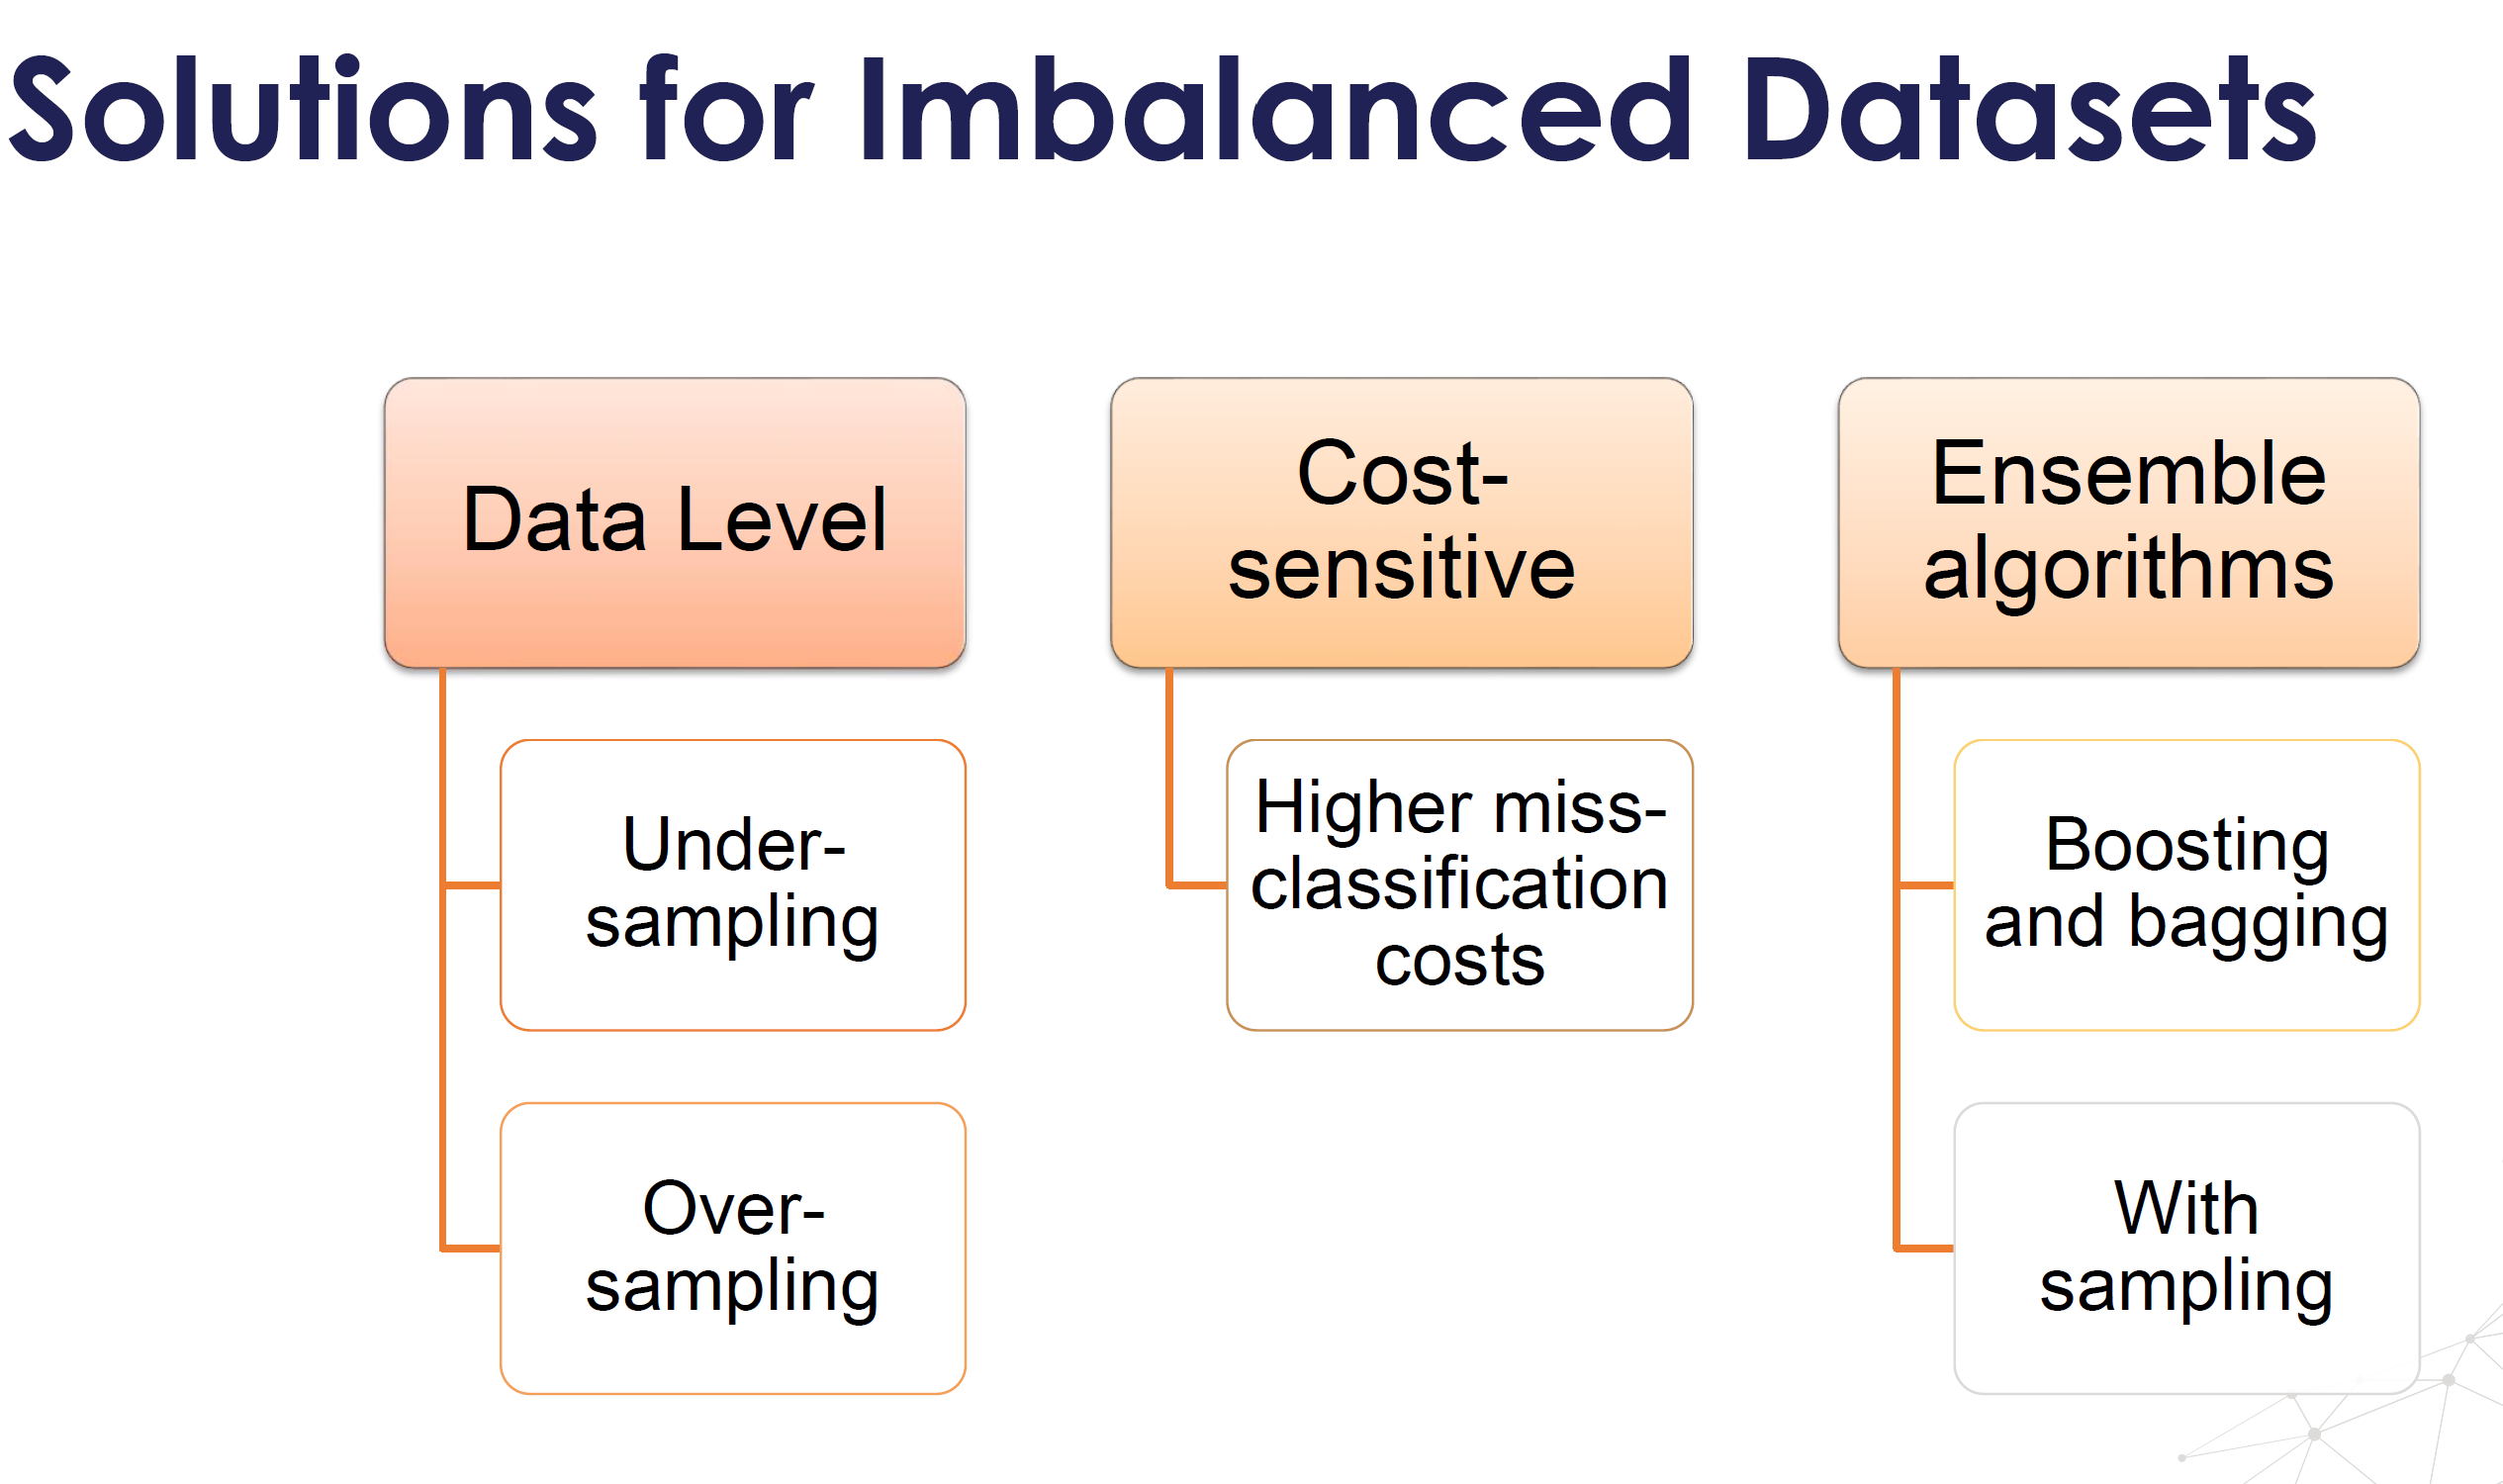

# Bien choisir les métriques pour mesurer les performances des modèles

Généralement en machine learning, il faut s’attarder sur le choix des métriques de mesure des performances. Cette règle est encore plus fondamentale lorsque l’on travaille sur des données déséquilibrées. Même si ça ne nous permet pas de contrer le problème, bien choisir les métriques nous permettra d’éviter des déconvenues.<br>

Par exemple, en classification binaire il est d’usage d’utiliser le pourcentage de bonnes prédictions comme score. Sauf que ce pourcentage peut être élevé même si une grande partie des points de la classe minoritaire sont mal classifiés. Le score va lui aussi être affecté par le déséquilibre des classes. On pourrait croire que notre modèle est bon même lorsqu’il n’est bon que pour la classe majoritaire. Pour pallier ce problème, nous allons nous tourner vers des métriques qui ne seront pas affectées par la mauvaise répartition. 
On pourra utiliser des métriques qui seront beaucoup moins influencées par la classe majoritaire. Le recall (sensibilité) ou le F-Score sont de bons exemples.

**L’accuracy** (ou “précision” en français, à ne pas confondre avec la “precision” en anglais qui désigne une autre métrique), est une mesure souvent utilisée comme indicateur de performance. Toutefois, elle est contre-indiquée pour les datasets déséquilibrés : il sera en effet très facile d’obtenir un très bon score d’accuracy sur ce type de dataset, sans pour autant que les modèles n’aient appris quoique ce soit, si ce n’est que de jouer la sécurité en prédisant toujours la classe majoritaire ! Cette métrique peut donc se révéler trompeuse car elle ne reflétera pas l’état d’apprentissage du modèle.

Dans la tâche de classification, la **matrice de confusion** est le principal indicateur de la qualité d’un modèle. Il s’agit d’un tableau à double entrée mettant en correspondance les classes réelles et les classes prédites par le modèle.

Elle sert de base à tous les calculs d’indicateurs.

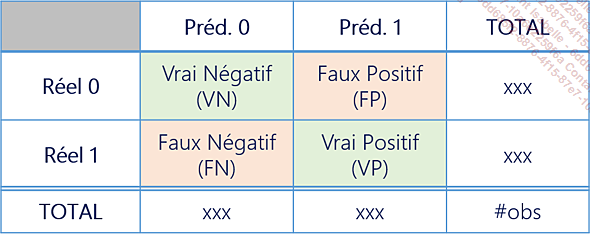

Il y a quatre cellules différentes :

- Les vrais positifs (VP) : ils appartiennent à la classe "positive" ou 1 et ont été prédits comme tels.
- Les vrais négatifs (VN) : ils appartiennent à la classe "négative" ou 0 et ont été prédits comme tels.
- Les faux positifs (FP) : ils appartiennent à la classe négative mais ont été prédits comme étant dans la classe positive. Il s’agit d’erreurs ("erreurs de type I")
- Les faux négatifs (FN) : ils appartiennent à la classe positive mais ont été prédits comme étant de la classe négative. Il s’agit d’erreurs ("erreurs de type II")


Le choix de la classe positive ou négative dans une classification binaire dépend surtout du domaine et de l’utilisation qui sera faite du modèle. La classe positive est celle qui doit être détectée, et la classe négative son opposé. Dans notre cas, **la classe positive est "Le client a des difficultés de paiement".**

Les faux positifs sont aussi appelés "erreurs de type I" et les faux négatifs "erreurs de type II". En général, une erreur de type I est moins grave qu’une erreur de type II.

Pour la recherche d’une maladie par exemple, l’erreur de type I correspond à des patients sains qui auraient été prédits malades par le modèle. Des tests complémentaires permettront de détecter cette erreur (si le traitement est lourd) ou les patients peuvent avoir un traitement alors qu’ils n’en nécessitaient pas, s’il est léger et sans effet secondaire. 
L’erreur de type II, en revanche, correspond à des patients malades qui n’ont pas été détectés. Ils ne recevront donc aucun traitement pour la maladie dont ils souffrent, ce qui peut avoir de très graves conséquences.

**Dans le cas d’une recherche de défauts, il est souvent moins grave de détecter des objets sans défauts comme en ayant que fournir un produit défectueux au client. En effet, dans le premier cas, un responsable de la qualité pourra s’en rendre compte et remettre le produit dans la chaîne, au pire il sera jeté ou recyclé. Dans le deuxième, le client peut se plaindre et l’image de la marque en souffrir.**

De nombreux indicateurs ont été dérivés de cette matrice.

## Accuracy (précision)

L’accuracy est le premier indicateur dérivé de la matrice de confusion. Il consiste à regarder quelle proportion des prédictions est juste : (VP + VN) / Total 

Cet indicateur doit bien sûr être maximisé. Sa valeur est toujours comprise entre 0 et 1.

L’accuracy a cependant trois défauts majeurs :

- En premier, elle ne donne aucune information sur le type des erreurs commises. Comme les erreurs de type I et les erreurs de type II n’ont généralement pas le même impact, il est primordial de ne pas se limiter à cet indicateur.

- En deuxième, lorsque les classes sont déséquilibrées, l’accuracy est peu informative. Dans le cas d’une détection de défauts avec seulement 1 % de pièces défectueuses, une accuracy de 99 % peut ainsi indiquer que le modèle considère que toutes les pièces sont correctes, ou bien détecter une partie des défauts. 

- En troisième, une accuracy de 100 % en validation n’est quasiment jamais l’objectif. En effet, avec l’expérience, les Data Scientists savent qu’un modèle qui semble trop bien marcher cache souvent des failles. Peut-être qu’il y a eu surapprentissage, peut-être que les données de validation sont trop proches de l’ensemble d’apprentissage, peut-être qu’il y a des informations non voulues indiquant la classe (comme l’index si les données sont triées).

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [14]:
rf = RandomForestClassifier(n_estimators=100, random_state=101, max_depth=2, n_jobs=4)

rf.fit(X_train_sd, y_train)

y_train_rf = rf.predict_proba(X_train_sd)
y_valid_rf = rf.predict_proba(X_valid_sd)

In [15]:
logit = LogisticRegression(random_state=101,  max_iter=100)

logit.fit(X_train_sd, y_train)

y_train_logit = logit.predict_proba(X_train_sd)
y_valid_logit = logit.predict_proba(X_valid_sd)

In [16]:
print(f"Accuracy Random Forest test : {accuracy_score(y_valid, rf.predict(X_valid_sd)):.2%}")
print(f"Accuracy Logistic Regression test : {accuracy_score(y_valid, logit.predict(X_valid_sd)):.2%}")

Accuracy Random Forest test : 91.93%
Accuracy Logistic Regression test : 91.92%


In [17]:
# Pourcentage de la minorité correctement classée

def return_minority_perc(y_true, y_pred):
    minority_total = np.sum(y_true)
    if np.where(y_true == 1):
        minority_correct = np.sum(np.where(y_pred == 1, 1, 0))
    minority_perc = minority_correct / minority_total  
    return minority_perc[0]

print(f"% de la minorité correctement classée, Random Forest test : {return_minority_perc(y_valid, rf.predict(X_valid_sd)):.2%}")
print(f"% de la minorité correctement classée, Logistic Regression test : {return_minority_perc(y_valid, logit.predict(X_valid_sd)):.2%}")

% de la minorité correctement classée, Random Forest test : 0.00%
% de la minorité correctement classée, Logistic Regression test : 0.58%


## Rappel, précision et F1-score (Recall & Precision)

Comme l’accuracy ne distingue pas le type des erreurs commises, elle est souvent complétée de ces deux indicateurs : rappel (recall en anglais) et précision.

Le **rappel** est la proportion de la classe positive détectée (compris entre 0 et 1). Sa formule est : VP / (VP + FN)

Un fort rappel indique donc que presque tous les cas de la classe positive ont été détectés, par exemple qu’une très grande partie des patients réellement malades ont été classés comme tels. **Plus le rappel est fort et moins il y a d’erreurs de type II, qui sont généralement les plus graves.**

La **précision** est, elle, la proportion des vrais positifs dans l’ensemble des positifs détectés (aussi comprise entre 0 et 1). Sa formule est : VP / (VP + FP)

Elle permet d’analyser, dans les cas qui sont sortis positifs par le modèle, quelle proportion l’est réellement. Cela permet d’estimer le nombre d’erreurs de type I (les faux positifs).

En fonction des problèmes métiers, l’un des deux indicateurs aura un plus fort impact que l’autre. Il peut donc être intéressant de ne pas choisir un modèle selon son accuracy mais selon son rappel et/ou sa précision.

Le but du **F1-score** (ou "score F1") est de donner un unique indicateur qui prenne en compte le rappel et la précision, sans tomber dans les pièges de l’accuracy.

Sa définition est la moyenne harmonique de la précision et du rappel. En pratique cela donne la formule suivante : 2 * (precision * recall) / (precision + recall)

Sa valeur varie de 0 à 1. Un score de 1 indique une précision et un rappel de 100 %.

Comme généralement les erreurs de type I ou de type II n’ont pas le même impact, il est possible de calculer le Fβ-score avec la valeur de β correspondant au coût relatif des erreurs de type II par rapport au type I. Le symbole β est en pratique remplacé par la valeur relative du rappel sur la précision.

Le score F1 en est donc un cas particulier où rappel et précision ont la même importance. Un score F2 indique que le rappel a deux fois plus d’impact que la précision, ou, autrement dit, qu’une erreur de type II est deux fois plus coûteuse qu’une erreur de type I.

Sa formule générale est la suivante : $F_\beta=\frac{\left(1+\beta^2\right) * \text { précision } * \text { rappel }}{\left(\beta^2 * \text { précision }\right)+\text { rappel }}$

Ramener les deux indicateurs de précision et de rappel à un seul n’a cependant pas que des avantages, et une partie de l’information est perdue.

L’utilisation du F1-score ne fait donc pas l’unanimité, même si tous les logiciels le proposent dans les indicateurs traditionnels.

In [18]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    precision_recall_fscore_support,
)

from yellowbrick.classifier import (
    ClassificationReport,
    DiscriminationThreshold,
)

In [19]:
print(f"Precision Random Forest test : {precision_score(y_valid, rf.predict(X_valid_sd)):.2%}")
print(f"Precision Logistic Regression test : {precision_score(y_valid, logit.predict(X_valid_sd)):.2%}")

Precision Random Forest test : 0.00%
Precision Logistic Regression test : 39.53%


In [20]:
print(f"Recall Random Forest test : {recall_score(y_valid, rf.predict(X_valid_sd), pos_label=1):.2%}")
print(f"Recall Logistic Regression test : {recall_score(y_valid, logit.predict(X_valid_sd), pos_label=1):.2%}")

Recall Random Forest test : 0.00%
Recall Logistic Regression test : 0.23%


In [21]:
print(f"F1 score Random Forest test : {f1_score(y_valid, rf.predict(X_valid_sd), pos_label=1):.2%}")
print(f"F1 score Logistic Regression test : {f1_score(y_valid, logit.predict(X_valid_sd), pos_label=1):.2%}")

F1 score Random Forest test : 0.00%
F1 score Logistic Regression test : 0.45%


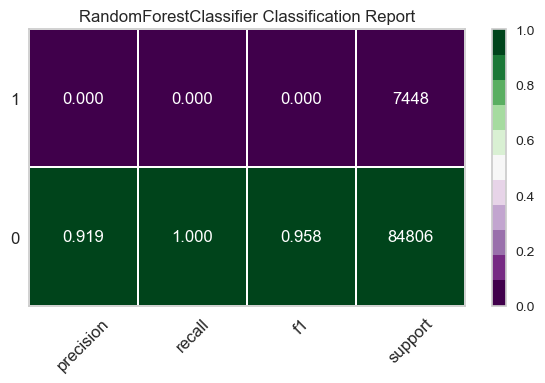

<AxesSubplot: title={'center': 'RandomForestClassifier Classification Report'}>

In [22]:
fig, ax = plt.subplots(figsize=(6, 4))

visualizer = ClassificationReport(rf, support=True, cmap='PRGn')

visualizer.fit(X_train_sd, y_train)        # Fit the visualizer and the model
visualizer.score(X_valid_sd, y_valid)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

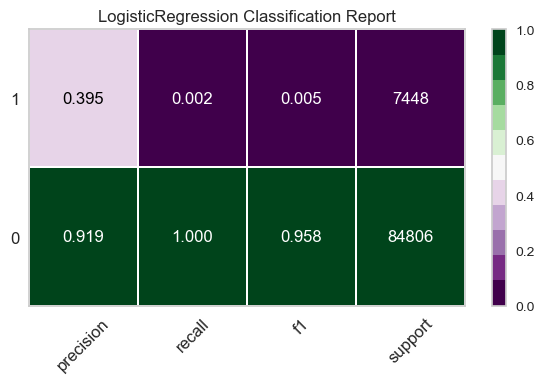

<AxesSubplot: title={'center': 'LogisticRegression Classification Report'}>

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))

visualizer = ClassificationReport(logit, support=True, cmap='PRGn')

visualizer.fit(X_train_sd, y_train)        # Fit the visualizer and the model
visualizer.score(X_valid_sd, y_valid)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

## Precision and Recall, vs probability threshold

Visualise comment la précision, le rappel, le score f1 et le "queue rate" changent à mesure que le seuil de discrimination augmente. Pour les classificateurs binaires probabilistes, le seuil de discrimination est la probabilité à laquelle on choisit la classe positive plutôt que la négative. 
Généralement, cela est réglé sur 50 %, mais l'ajustement du seuil de discrimination ajustera la sensibilité aux faux positifs qui est décrite par la relation inverse de la précision et du rappel par rapport au seuil.

Le visualiseur tient également compte de la variabilité du modèle en exécutant plusieurs essais avec différentes fractions de train et de test des données. La variabilité est visualisée à l'aide d'une bande telle que la courbe est tracée comme le score médian de chaque essai et la bande va du 10e au 90e centile.

Le visualiseur est destiné à aider les utilisateurs à déterminer un seuil approprié pour la prise de décision (par exemple, à quel seuil un humain examine-t-il les données), compte tenu d'une tolérance de précision et de rappel ou de la limitation du nombre d'enregistrements à vérifier (the queue rate).

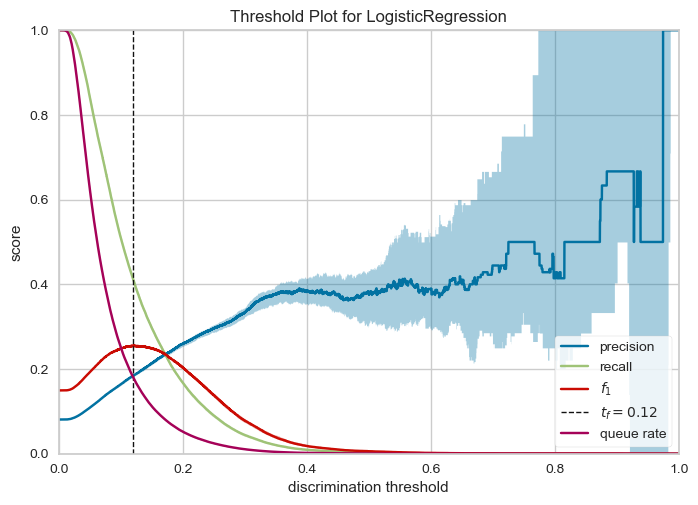

<AxesSubplot: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [24]:
visualizer = DiscriminationThreshold(logit,
                                     n_trials=50,
                                     cv=0.5,
                                     argmax='fscore',
                                     random_state=101,
                                     is_fitted='auto')

visualizer.fit(X_train_sd, y_train)        # Fit the visualizer and the model
visualizer.score(X_valid_sd, y_valid)        # Evaluate the model on the test data
visualizer.show()  

##  Balanced Accuracy Weighted

La Balanced Accuracy Weighted est une famille de métriques de classification qui introduit une pondération et permet d’adapter l’accuracy au cas des données déséquilibrées.

La Balanced Accuracy Weighted (BAW), aussi connue sous le nom de Weighted Balanced Accuracy, est une famille de métriques de classification pour les problèmes à deux classes ou plus. Ses deux variantes les plus courantes sont l’accuracy et la balanced accuracy.

Comme les autres métriques, la Balanced Accuracy Weighted (BAW) est basée sur la matrice de confusion.

La BAW est définie comme une moyenne pondérée (arbitrairement) des recall des différentes classes. Dans le cas de la classification binaire, le recall des positifs (taux de positifs correctement prédits) est appelé sensitivity, tandis que le recall des négatifs (taux de négatifs correctement prédits) est appelé specificity : balanced-accuracy $=\frac{1}{2}\left(\frac{V P}{V P+F N}+\frac{V N}{V N+F P}\right)$


Si le classificateur fonctionne aussi bien sur l'une ou l'autre classe, ce terme se réduit à la précision conventionnelle (c'est-à-dire le nombre de prédictions correctes divisé par le nombre total de prédictions).

En revanche, si la précision conventionnelle est supérieure au hasard uniquement parce que le classificateur tire parti d'un ensemble de tests déséquilibré, alors la précision équilibrée, le cas échéant, tombera à $\frac{1}{n_{-} \text {classes }}$


In [25]:
from sklearn.metrics import balanced_accuracy_score

print(f"Balanced accuracy Random Forest test : {balanced_accuracy_score(y_valid, rf.predict(X_valid_sd)):.2%}")
print(f"Balanced accuracy Logistic Regression test : {balanced_accuracy_score(y_valid, logit.predict(X_valid_sd)):.2%}")

Balanced accuracy Random Forest test : 50.00%
Balanced accuracy Logistic Regression test : 50.10%


In [26]:
# with the below parameters in the recall_score function we can obtain the recall
# in each class:

print('Recall Random Forest test, class 0 and 1:', recall_score(y_valid, rf.predict(X_valid_sd), labels=[0,1], average=None))

print('Recall Logistic Regression test, class 0 and 1:',  recall_score(y_valid, logit.predict(X_valid_sd), labels=[0,1], average=None))

Recall Random Forest test, class 0 and 1: [1. 0.]
Recall Logistic Regression test, class 0 and 1: [0.99969342 0.00228249]


## ROC-AUC

La courbe ROC (Receiver Operating Charasteristic) et l’AUC (Area Under Curve, soit l’aire sous la courbe) sont deux indicateurs permettant d’analyser un modèle et en particulier son seuil de détection.

La courbe ROC vise à mesurer la qualité d’un modèle en s’affranchissant des coûts de mauvaise affectation et de la représentativité de l’échantillon utilisé (les proportions des classes dans l’échantillon peuvent être différentes de celles de la population).

La courbe ROC (ou courbe des caractéristiques de fonctionnement du récepteur ) est une mesure graphique populaire pour évaluer les performances ou la précision d’un classificateur, qui correspond à la proportion totale d’observations correctement classées.

Deux indicateurs sont utilisés pour tracer la courbe ROC :

- Le taux de vrais positifs (TVP) : Le taux de vrais positifs correspond à la proportion de vrais positifs sur l’ensemble des données positives. Il s’agit donc d’un autre nom du rappel ou de la sensibilité.

- Le taux de faux positifs (TFP) : Le taux de faux positifs correspond à la proportion de faux positifs sur l’ensemble des négatifs. Il se calcule donc comme étant 1 - spécificité.

Étant donné que nous ne connaissons généralement pas le seuil de probabilité à l’avance, la courbe ROC est généralement utilisée pour tracer le taux de vrais positifs (ou la sensibilité sur l’axe des y) par rapport au taux de faux positifs (ou “1-spécificité” sur l’axe des x) à tous les seuils de probabilité possibles. Cela montre le compromis entre le taux auquel vous pouvez correctement prédire quelque chose et le taux de prédiction incorrecte de quelque chose. Une autre représentation visuelle du tracé ROC consiste simplement à afficher la sensibilité par rapport à la spécificité.

Avec un seuil de 0, toutes les données sont classées comme positives. Le TVP est donc de 1 car toutes les données positives sont bien estimées dans la classe positive. Mais les données négatives sont aussi prédites dans la classe positive, ce qui fait un TFP de 1 (une sensibilité nulle).

À l’inverse, avec un seuil à 1, aucune donnée n’est positive, le TVP est donc nul. Comme toutes les données sont prédites en négative, il n’y a aucun faux positif, et la TFP est nulle aussi.

La courbe ROC relie donc toujours les points O (0,0) et I (1,1). De plus, elle doit être au-dessus de la ligne (OI) car cette ligne représente un tirage aléatoire de la classe.
Pour un bon modèle, la courbe ROC doit augmenter fortement, indiquant que le taux de vrais positifs (axe des y) augmente plus rapidement que le taux de faux positifs (axe des x) à mesure que le seuil de probabilité diminue.

Les courbes ROC présentent généralement un taux de vrais positifs sur l'axe Y et un taux de faux positifs sur l'axe X. Cela signifie que le coin supérieur gauche du graphique est le point "idéal" - un taux de faux positifs de zéro et un taux de vrais positifs de un. Ce n'est pas très réaliste, mais cela signifie qu'une plus grande surface sous la courbe (AUC) est généralement meilleure.

La «pente» des courbes ROC est également importante, car elle est idéale pour maximiser le taux de vrais positifs tout en minimisant le taux de faux positifs.

L’ aire sous la courbe ( AUC ) résume la performance globale du classificateur, sur tous les seuils de probabilité possibles. Il représente la capacité d’un algorithme de classification à distinguer les classes. La métrique AUC varie entre 0,50 (classificateur aléatoire) et 1,00. Les valeurs supérieures à 0,80 sont une indication d’un bon classificateur.

Grâce à cette courbe, il devient facile de comparer deux modèles pour déterminer le meilleur : celui qui a sa courbe ROC bien au-dessus de l’autre. Dans le cas où les courbes se croisent, tout dépendra des erreurs les moins graves et des seuils choisis, mais c’est le point le plus proche de (0,1) qui sera le plus intéressant (soit le coin en haut à gauche).

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve

from yellowbrick.classifier import ROCAUC

### Random Forest Classifier

In [28]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=101, max_depth=2, n_jobs=4)

rf_model.fit(X_train_sd, y_train)

# prediction des probabilities et conservation uniquement des probabilités pour le résultat positif
y_train_rf = rf_model.predict_proba(X_train_sd)[:,1]
y_valid_rf = rf_model.predict_proba(X_valid_sd)[:,1]

In [29]:
print(f"ROC-AUC Random Forest Train : {roc_auc_score(y_train, y_train_rf):.2%}")
print(f"ROC-AUC Random Forest test : {roc_auc_score(y_valid, y_valid_rf):.2%}")

ROC-AUC Random Forest Train : 67.96%
ROC-AUC Random Forest test : 67.87%


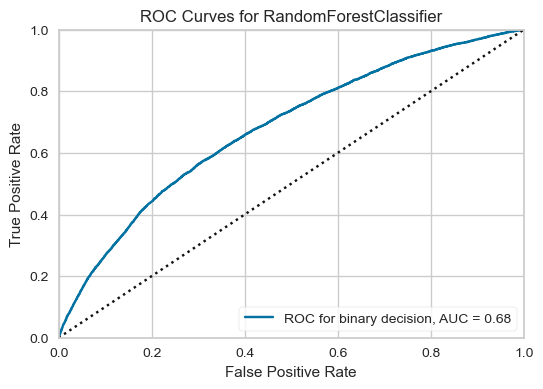

<AxesSubplot: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [30]:
fig, ax = plt.subplots(figsize=(6, 4))

visualizer = ROCAUC(rf_model, binary=True, 
                    random_state=101)

visualizer.fit(X_train_sd, y_train)        
visualizer.score(X_valid_sd, y_valid)
visualizer.show()                       

Nous pouvons voir qu'il existe un certain nombre de points ou de seuils proches du coin supérieur gauche du graphique.

***Quel est le seuil optimal ?***

Il existe de nombreuses façons de localiser le seuil avec l'équilibre optimal entre les taux de faux positifs et de vrais positifs.

Premièrement, le taux de vrai positif est appelé la sensibilité. L'inverse du taux de faux positifs est appelé la Spécificité.

>**Sensibilité (TVP)** = Vrai Positif (VP) / (Vrai Positif (VP) + Faux Negatif (FN))<br>
>**Spécificité (TFP)** = Vrai Negatif (VN) / (Faux Positif (FP) + Vrai Negatif (VF))
>
>Où:
>
>**Sensibilité** = taux de vrais positifs<br>
>**Spécificité** = 1 – Taux de faux positifs

La moyenne géométrique ou G-Mean est une métrique de classification déséquilibrée qui, si elle est optimisée, cherchera un équilibre entre la sensibilité et la spécificité.

>**G-Mean** = sqrt(Sensibilité * Spécificité)

Une approche consisterait à tester le modèle avec chaque seuil renvoyé par l'appel roc_auc_score() et à sélectionner le seuil avec la plus grande valeur G-Mean.

Étant donné que nous avons déjà calculé la sensibilité (TVP) et le complément à la spécificité lorsque nous avons calculé la courbe ROC, nous pouvons calculer directement le G-Mean pour chaque seuil.

Une fois calculé, nous pouvons localiser l'indice du score G moyen le plus élevé et utiliser cet indice pour déterminer la valeur seuil à utiliser.

https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

In [31]:
# calculate roc curves
TFP, TVP, thresholds = roc_curve(y_valid, y_valid_rf)

In [32]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(TVP * (1-TFP))

In [33]:
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print(f"Best-Threshold={thresholds[ix]:.2%}, G-Mean={gmeans[ix]:.2%}")

Best-Threshold=8.16%, G-Mean=63.09%


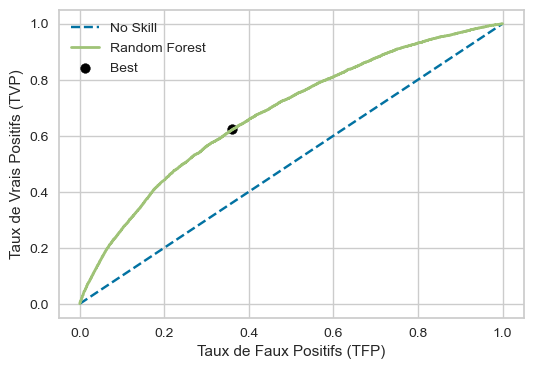

In [34]:
# plot the roc curve for the model

fig, ax = plt.subplots(figsize=(6, 4))

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(TFP, TVP, linestyle='-', linewidth=2, label='Random Forest')
plt.scatter(TFP[ix], TVP[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Taux de Faux Positifs (TFP)')
plt.ylabel('Taux de Vrais Positifs (TVP)')
plt.legend()
# show the plot
plt.show()

### Logistic Regression

In [35]:
logit_model = LogisticRegression(random_state=101,  max_iter=100)

logit_model.fit(X_train_sd, y_train)

y_train_logit = logit_model.predict_proba(X_train_sd)[:,1]
y_valid_logit = logit_model.predict_proba(X_valid_sd)[:,1]

In [36]:
print(f"ROC-AUC Logistic Regression Train : {roc_auc_score(y_train, y_train_logit):.2%}")
print(f"ROC-AUC Logistic Regression test : {roc_auc_score(y_valid, y_valid_logit):.2%}")

ROC-AUC Logistic Regression Train : 70.40%
ROC-AUC Logistic Regression test : 70.25%


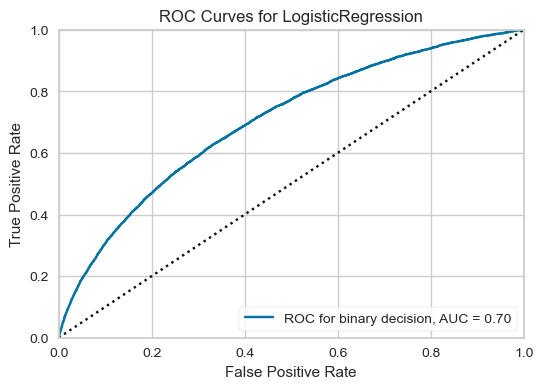

<AxesSubplot: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [37]:
fig, ax = plt.subplots(figsize=(6, 4))

visualizer = ROCAUC(logit_model, binary=True, random_state=101)

visualizer.fit(X_train_sd, y_train)        # Fit the visualizer and the model
visualizer.score(X_valid_sd, y_valid)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

Best-Threshold=8.02%, G-Mean=64.75%


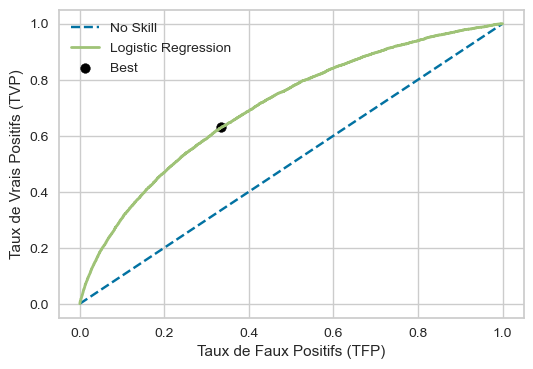

In [38]:
# calculate roc curves
TFP, TVP, thresholds = roc_curve(y_valid, y_valid_logit)

# calculate the g-mean for each threshold
gmeans = np.sqrt(TVP * (1-TFP))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print(f"Best-Threshold={thresholds[ix]:.2%}, G-Mean={gmeans[ix]:.2%}")

# plot the roc curve for the model

fig, ax = plt.subplots(figsize=(6, 4))

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(TFP, TVP, linestyle='-', linewidth=2, label='Logistic Regression')
plt.scatter(TFP[ix], TVP[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Taux de Faux Positifs (TFP)')
plt.ylabel('Taux de Vrais Positifs (TVP)')
plt.legend()
# show the plot
plt.show()


## Precision-Recall (PR) Curve et AUC Precision Recall

Lorsque nous travaillons avec des ensembles de données déséquilibrés que nous avons besoin d'une métrique d'évaluation plus sophistiquée qui nous permet de raisonner clairement sur les compromis.

Là où **la courbe PR brille par rapport à la courbe ROC, c'est lorsque nous avons affaire à des ensembles de données déséquilibrés et que nous nous intéressons à la classe minoritaire.**


L' axe des x de la courbe PR et l' axe des y de la courbe ROC représentent le rappel, nous voyons donc qu'ils se développent de manière similaire. Cette courbe se concentre principalement sur la performance de la classe positive qui est cruciale lorsqu'il s'agit de classes déséquilibrées. 

Dans l'espace PR, l'objectif est d'être dans le coin supérieur droit - le coin supérieur droit (1, 1) signifie que nous avons classé tous les positifs comme positifs ( Rappel = 1 ) et que tout ce que nous classons comme positif est vrai positif ( Precision=1 ) — ce dernier se traduit par zéro faux positif. Dans ce cas, la « courbe» pour un classificateur sans compétence est une ligne horizontale obtenue par P/(N+P) qui est représentée par la ligne pointillée — c'est le cas où le classificateur prédit toujours la classe minoritaire, c'est-à- dire positive.

**L’AUC Precision Recall mesure la performance d’un modèle de classification de façon interprétable et robuste.**
Pour prendre en compte le compromis entre la Precision et le Recall (notions présentées en détail dans l’article précédent), on s’intéresse à une métrique qui résume la performance globale du modèle : l’AUC Precision Recall, aussi noté AUC PR.

Le terme AUC signifie Area Under the Curve, aire sous la courbe en français. La métrique AUC PR consiste donc à calculer l’aire sous la courbe Precision Recall.
L’AUC Precision Recall permet d’évaluer la performance globale d’un modèle. Il est égal à 100% pour un modèle parfait et au taux de positifs pour un modèle non-informatif. La performance d’un modèle de Machine Learning se situe donc entre ces valeurs. Une valeur significativement inférieure au taux de positifs indique une erreur dans le code : le modèle a extrait de l’information des données mais a inversé ses prédictions.

Comme il est global – calculé sur l’ensemble des seuils – l’AUC Precision Recall peut être une bonne métrique pour l’optimisation des hyperparamètres d’un modèle (par bayesian search, random search, gridsearch etc.), voire pour faire de l’early stopping en boosting (Gradient Boosting Machine, XGBoost etc.).

Il ne doit en revanche pas être utilisé comme une fonction de coût (loss function) optimisée directement par l’algorithme car il n’a pas les propriétés de régularité (smoothness) et de convexité requises.

Si nous sommes intéressés par un **seuil qui donne le meilleur équilibre entre précision et rappel**, cela revient à optimiser la mesure F qui résume la moyenne harmonique des deux mesures.

>**Mesure F** = (2 * Précision * Rappel) / (Précision + Rappel)

https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

In [39]:
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.metrics import precision_recall_curve, auc

### Précision-Rappel : Random Forest Classifier

In [40]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=101, max_depth=2, n_jobs=4)

rf_model.fit(X_train_sd, y_train)

# prediction des probabilities et conservation uniquement des probabilités pour le résultat positif
y_train_rf = rf_model.predict_proba(X_train_sd)[:,1]
y_valid_rf = rf_model.predict_proba(X_valid_sd)[:,1]

In [41]:
# random forests

# first find precision and recall various 
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_valid, y_valid_rf)

# then using these values, determine the area under the curve
auc_rf = auc(recall_rf, precision_rf)
print(f"Area under PR Curve Random Forests : {auc_rf:.2%}")

Area under PR Curve Random Forests : 15.94%


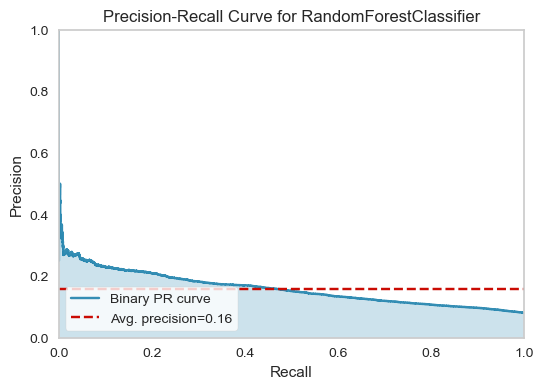

<AxesSubplot: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [42]:
fig, ax = plt.subplots(figsize=(6, 4))

visualizer = PrecisionRecallCurve(rf_model, random_state=101)

visualizer.fit(X_train_sd, y_train)        # Fit the visualizer and the model
visualizer.score(X_valid_sd, y_valid)        # Evaluate the model on the test data
visualizer.show()  

Randon Forest : 
Best-Threshold=9.27%, F-Score==23.98%


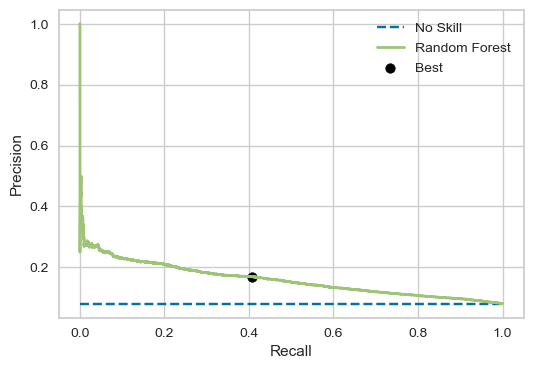

In [43]:
# convert to f score
fscore_rf = ((2 * precision_rf * recall_rf) / (precision_rf + recall_rf))

# locate the index of the largest f score
ix = np.argmax(fscore_rf[~np.isnan(fscore_rf)])
print(f"Randon Forest : \nBest-Threshold={thresholds_rf[ix]:.2%}, F-Score=={fscore_rf[ix]:.2%}")

# plot the roc curve for the model

fig, ax = plt.subplots(figsize=(6, 4))

no_skill = y_valid.query('target > 0').shape[0] / len(y_valid)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall_rf, precision_rf, linestyle='-', linewidth=2, label='Random Forest')
plt.scatter(recall_rf[ix], precision_rf[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

### Précision-Rappel : Logistic Regression

In [44]:
logit_model = LogisticRegression(random_state=101,  max_iter=100)

logit_model.fit(X_train_sd, y_train)

y_train_lr = logit_model.predict_proba(X_train_sd)[:,1]
y_valid_lr = logit_model.predict_proba(X_valid_sd)[:,1]

In [45]:
# Logistic Regression

# first find precision and recall various 
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_valid, y_valid_lr)

# then using these values, determine the area under the curve
auc_lr = auc(recall_lr, precision_lr)
print(f"Area under PR Curve Logistic Regression : {auc_lr:.2%}")

Area under PR Curve Logistic Regression : 18.08%


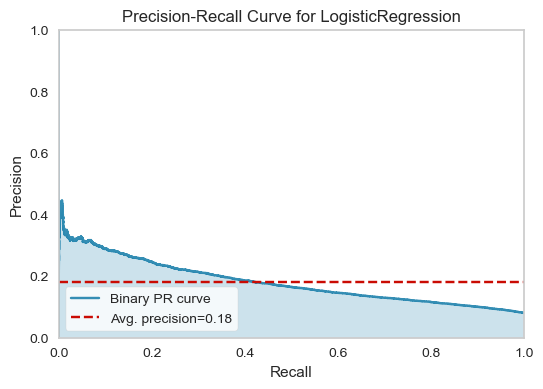

<AxesSubplot: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [46]:
fig, ax = plt.subplots(figsize=(6, 4))

visualizer = PrecisionRecallCurve(logit_model, random_state=101)

visualizer.fit(X_train_sd, y_train)        # Fit the visualizer and the model
visualizer.score(X_valid_sd, y_valid)        # Evaluate the model on the test data
visualizer.show()  

Logistic Regression : 
Best-Threshold=12.18%, F-Score==25.49%


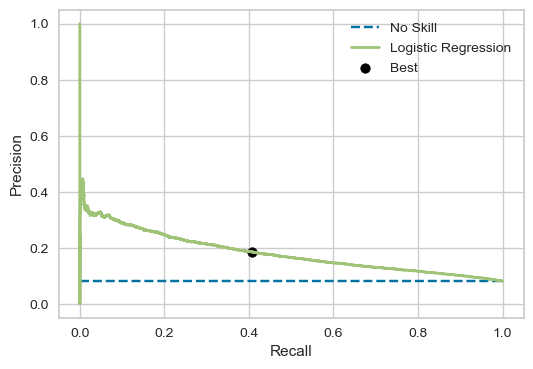

In [47]:
# convert to f score
fscore_lr = ((2 * precision_lr * recall_lr) / (precision_lr + recall_lr))

# locate the index of the largest f score
ix = np.argmax(fscore_lr[~np.isnan(fscore_lr)])
print(f"Logistic Regression : \nBest-Threshold={thresholds_lr[ix]:.2%}, F-Score=={fscore_lr[ix]:.2%}")

# plot the roc curve for the model

fig, ax = plt.subplots(figsize=(6, 4))

no_skill = y_valid.query('target > 0').shape[0] / len(y_valid)
plt.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall_lr, precision_lr, linestyle='-', linewidth=2, label='Logistic Regression')
plt.scatter(recall_lr[ix], precision_lr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

   - Rappel élevé + Précision élevée : la classe minoritaire est parfaitement gérée par le modèle et ce dernier est capable de bien différencier les différentes classes.
   - Faible rappel + haute précision : le modèle ne peut pas bien détecter la classe, mais il est très fiable lorsqu'il le fait.
   - Rappel élevé + Précision faible : la classe est bien détectée mais le modèle classe également mal les points de la majorité
   - Faible rappel + Faible précision : la classe est mal gérée par le modèle

# Choix du modèle de prédiction avec Prise en compte du déséquilibre des classes

## Modèles de prédiction de référence

Nous évaluerons les modèles candidats à l'aide d'une **validation croisée stratifiée répétée k-fold.**

Le k-fold procédure de validation croisée fournit une bonne estimation générale de la performance du modèle qui n'est pas trop biaisée par l'optimisme, du moins par rapport à une seule séparation train-test.
Nous utiliserons k = 10, ce qui signifie que chaque pli contiendra 92254 / 10 soit environ 9225 échantillons (clients). Stratifié signifie que chaque pli contiendra le même mélange d'exemples par classe, c'est-à-dire environ 92% de classe 0 et 8% de classe 1. Répété signifie que l'évaluation le processus sera effectué plusieurs fois pour aider à éviter les résultats aléatoires et mieux capturer la variance du modèle choisi. Nous utiliserons trois répétitions. Cela signifie qu'un seul modèle sera ajusté et évalué 10 × 3 (30) fois et la moyenne et l'écart type de ces essais seront calculés. Ceci peut être réalisé en utilisant la classe scikit-learn `RepeatedStratifiedKFold`.

Nous allons prédire les étiquettes de classe indiquant si un client aura oui ou non des difficultés de paiement. Par conséquent, nous avons besoin d'une mesure appropriée pour évaluer les étiquettes de classe prédites. 

<p style="text-align:left; font-size:1.4em; color:#9EBEB8; line-height:4rem; font-style:italic; font-weight:700;">
    Choix de la La fonction de coût :
</p>


La tâche est centrée sur la classe positive (le client aura des difficultés de paiement). La précision et le rappel sont un bon point de départ.

> - *Maximiser la précision minimisera les faux positifs* : le client n'a pas de difficultés de paiement mais est prédit comme tel ==> perte de client pour la société de crédit (erreur de Type I) 
> - *Maximiser le rappel minimisera les faux négatifs* : le client a des difficultés de paiement mais est prédit comme n'en ayant pas ==> perte de chiffre d'affaires pour la société de crédit erreur de Type II) . 
> - L'utilisation de la mesure F calculera la moyenne harmonique entre la précision et le rappel. C'est un bon nombre unique qui peut être utilisé pour comparer et sélectionnez un modèle avec ce type de problème. 

La difficulté ici réside dans le fait que les **faux négatifs sont plus dommageables que les faux positifs**.

Les faux négatifs sur cet ensemble de données sont des cas où un mauvais client est marqué comme un bon client et se voit accorder un prêt alors que Les faux positifs sont des cas où un bon client est marqué comme un mauvais client et la société de crédit ne lui accorde pas de prêt. 
Les faux négatifs lui coûtent donc plus cher : **Cost(FalseNegatives) > Cost(FalsePositives)**

**Autrement dit, nous nous intéressons à la F-mesure qui résumera la capacité d'un modèle à minimiser les erreurs de classification pour la classe positive tout en privilégiant les modèles qui  minimisent les faux négatifs plutôt que les faux positifs.** 

Ceci peut être réalisé en utilisant une version de la F-mesure qui calcule une moyenne harmonique pondérée de précision et de rappel mais privilégie les scores de rappel supérieurs aux scores de précision. C'est ce qu'on appelle la **mesure Fbeta**, une généralisation de la F-mesure, où bêta est un paramètre qui définit la pondération des deux scores. 

La valeur de bêta dépend donc de manière indirecte de la fonction de perte que nous souhaitons appliquer sur chacun des deux cas erronés : les faux positifs et les faux négatifs.

Une valeur bêta de 2 accordera plus d'attention au rappel qu'à la précision et est appelé la mesure F2. 
**$$ \text { F2-measure }=\frac{\left(1+beta^2\right) \times \text { Precision } \times \text { Recall }}{beta^2 \times \text { Precision }+\text { Recall }}$$**

Nous utiliserons donc cette mesure pour évaluer les modèles sur l'ensemble de nos données. Elle peut être obtenue à l'aide de la fonction fbeta score() de scikit-learn.


In [48]:
import time

from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [49]:
# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

In [50]:
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)
    # define the model evaluation metric
    metric = make_scorer(f2_measure)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-2)
    return scores

DummyClassifier effectue des prédictions qui ignorent les entités d'entrée.

Ce classificateur sert de référence simple à comparer avec d'autres classificateurs plus complexes.

In [51]:
# define the reference model
model = DummyClassifier(strategy='constant', constant=1)

# evaluate the model
scores = evaluate_model(X_train_sd, y_train, model)

# summarize performance
print("Calcul du F2 pour le Modèle de Référence avec constante = 1 et sans variable explicative :")
print(f"Score F2 : moyenne = {np.mean(scores):.2%}, écart_type = {np.std(scores):.2%}")

Calcul du F2 pour le Modèle de Référence avec constante = 1 et sans variable explicative :
Score F2 : moyenne = 30.51%, écart_type = 0.01%


In [52]:
# define models to test
def get_models():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression())
    names.append('Logistic_Regression')
    # SVM
    models.append(LinearSVC())
    names.append('Linear_SVC')
    # TREE
    models.append(DecisionTreeClassifier())
    names.append('Decision_Tree_Classifier')
    # Random Forest
    models.append(RandomForestClassifier())
    names.append('Random_Forest_Classifier')
    # XGB
    models.append(XGBClassifier())
    names.append('XGB_Classifier') 
    # LGBM
    models.append(LGBMClassifier())
    names.append('LGBM_Classifier')
    return models, names

In [53]:
# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    temps = time.time()
    # wrap the model in a pipeline
    pipeline = Pipeline(steps=[('m', models[i])])
    scores = evaluate_model(X_train_sd, y_train, pipeline)
    results.append(scores)
    duration=time.time()-temps
    # summarize and store
    print(f"Score F2 du modèle {names[i]} : moyenne = {np.mean(scores):.2%}, écart_type = {np.std(scores):.2%}")
    print(f"Temps de Calcul pour {names[i]} : {duration:>15.2f} secondes")
    print(end='\n\n')

Score F2 du modèle Logistic_Regression : moyenne = 0.37%, écart_type = 0.17%
Temps de Calcul pour Logistic_Regression :            4.85 secondes


Score F2 du modèle Linear_SVC : moyenne = 0.02%, écart_type = 0.03%
Temps de Calcul pour Linear_SVC :          509.27 secondes


Score F2 du modèle Decision_Tree_Classifier : moyenne = 15.10%, écart_type = 0.90%
Temps de Calcul pour Decision_Tree_Classifier :           23.19 secondes


Score F2 du modèle Random_Forest_Classifier : moyenne = 0.33%, écart_type = 0.16%
Temps de Calcul pour Random_Forest_Classifier :          338.10 secondes


Score F2 du modèle XGB_Classifier : moyenne = 2.61%, écart_type = 0.35%
Temps de Calcul pour XGB_Classifier :          447.15 secondes


Score F2 du modèle LGBM_Classifier : moyenne = 1.06%, écart_type = 0.26%
Temps de Calcul pour LGBM_Classifier :           27.56 secondes




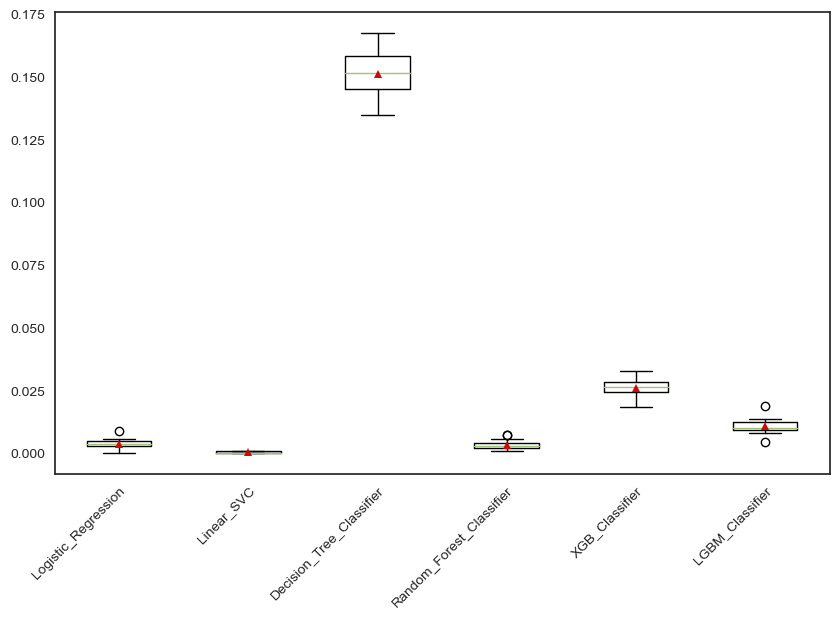

In [54]:
# plot the results
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(10, 6))

plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(fontsize=10, rotation=45, ha='right', rotation_mode='anchor')
plt.show()

Les résultats sont très décevants quelque soit le modèle utilisé !

En plus de supposer que la distribution des classes est équilibrée, la plupart des algorithmes d'apprentissage automatique supposent également que les erreurs de prédiction commises par un classificateur sont les mêmes, ce que l'on appelle *miss-classifications*. Ce n'est généralement pas le cas pour les problèmes de classification binaire, en particulier ceux qui ont une distribution de classe déséquilibrée.

## Prise en compte du déséquilibre des classes : *Cost-Sensitive Learning*

L'objectif de l'apprentissage sensible aux coûts est de minimiser le coût d'un modèle sur l'ensemble de données d'apprentissage, où l'on suppose que différents types d'erreurs de prédiction ont une valeur Coût associée différente et connue.

Il existe un lien étroit entre une classification déséquilibrée et un apprentissage sensible aux coûts.
Plus précisément, un problème d'apprentissage déséquilibré peut être résolu à l'aide d'un apprentissage sensible aux coûts.
Néanmoins, l'apprentissage sensible aux coûts est un sous-domaine d'étude distinct et le coût peut être défini plus largement que l'erreur de prédiction ou l'erreur de classification. Cela signifie que même si certaines méthodes de l'apprentissage sensible aux coûts peuvent être utiles en cas de classification déséquilibrée, elles ne le sont pas toutes, et inversement.

**L'apprentissage sensible aux coûts pour la classification déséquilibrée** se concentre d'abord sur l'attribution de différents coûts aux types d'erreurs de classification erronées qui peuvent être faites, puis en utilisant des méthodes spécialisées pour prendre ces coûts en compte. Les différents coûts de mauvaise classification sont mieux compris en utilisant l'idée d'une matrice de coûts.
Contrairement aux méthodes de suréchantillonnage et de sous-échantillonnage, les méthodes des pondérations équilibrées ne modifient pas le rapport des classes minoritaires et majoritaires. Au lieu de cela, il pénalise les mauvaises prédictions sur la classe minoritaire en donnant plus de poids à la fonction de perte.

**Un bon point de départ pour les tâches de classification déséquilibrées consiste à attribuer des coûts basés sur la distribution inverse des classes.**

In [55]:
# define models to test
def get_models_2():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression(class_weight='balanced'))
    names.append('Logistic_Regression_weight')
    # SVM
    models.append(LinearSVC(class_weight='balanced'))
    names.append('Linear_SVC_weight')
    # TREE
    models.append(DecisionTreeClassifier(class_weight='balanced'))
    names.append('Decision_Tree_Classifier_weight')
    # Random Forest
    models.append(RandomForestClassifier(class_weight="balanced"))
    names.append('Random_Forest_Classifier_weight')
    # XGB
    models.append(XGBClassifier(scale_pos_weight=99))
    names.append('XGB_Classifier_weight') 
    # LGBM
    models.append(LGBMClassifier(class_weight="balanced"))
    names.append('LGBM_Classifier_weight')
    return models, names

In [56]:
# define models
models, names = get_models_2()
results = list()

# evaluate each model
for i in range(len(models)):
    temps = time.time()
    # wrap the model in a pipeline
    pipeline = Pipeline(steps=[('m', models[i])])
    scores = evaluate_model(X_train_sd, y_train, pipeline)
    results.append(scores)
    duration=time.time()-temps
    # summarize and store
    print(f"Score F2 du modèle {names[i]} : moyenne = {np.mean(scores):.2%}, écart_type = {np.std(scores):.2%}")
    print(f"Temps de Calcul pour {names[i]} : {duration:>15.2f} secondes")
    print(end='\n\n')

Score F2 du modèle Logistic_Regression_weight : moyenne = 37.69%, écart_type = 0.58%
Temps de Calcul pour Logistic_Regression_weight :            5.24 secondes


Score F2 du modèle Linear_SVC_weight : moyenne = 37.59%, écart_type = 0.63%
Temps de Calcul pour Linear_SVC_weight :          516.20 secondes


Score F2 du modèle Decision_Tree_Classifier_weight : moyenne = 12.92%, écart_type = 0.72%
Temps de Calcul pour Decision_Tree_Classifier_weight :           23.96 secondes


Score F2 du modèle Random_Forest_Classifier_weight : moyenne = 0.13%, écart_type = 0.09%
Temps de Calcul pour Random_Forest_Classifier_weight :          284.12 secondes


Score F2 du modèle XGB_Classifier_weight : moyenne = 32.45%, écart_type = 0.17%
Temps de Calcul pour XGB_Classifier_weight :          372.27 secondes


Score F2 du modèle LGBM_Classifier_weight : moyenne = 39.53%, écart_type = 0.64%
Temps de Calcul pour LGBM_Classifier_weight :           26.53 secondes




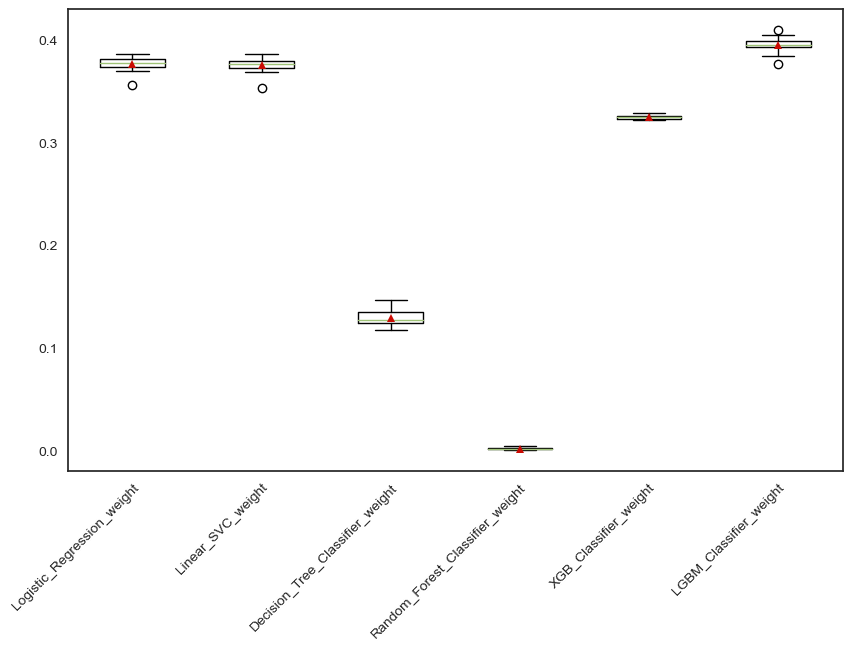

In [57]:
# plot the results
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(10, 6))

plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(fontsize=10, rotation=45, ha='right', rotation_mode='anchor')
plt.show()

Nous pouvons voir que 3 des modèles testés ont une mesure F2 supérieure à la valeur par défaut de prédire la classe majoritaire dans tous les cas (30.5%).
Les 3 meilleurs scores F2 sont obtenus avec les modèles light GBM (40%) puis la régression logistique et LinearSVC (38%).

L'utilisation d'une pondération de classe qui est le rapport inverse des données d'apprentissage n'est qu'une heuristique. Il est possible que de meilleures performances puissent être obtenues avec une pondération de classe différente, et cela aussi dépendra du choix de la mesure de performance utilisée pour évaluer le modèle. Dans cette section, nous rechercherons à l'aide d'une grille une gamme de pondérations de classe différentes pour les 2 premiers modèles que nous avons sélectionnés (Le SVM nécessitant un temps de calcul trop important) et découvrirons celui qui se traduit par le meilleur score F2.

### La régression logistique pondérée

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
# define model
model = LogisticRegression()

# Recherche des meilleurs paramètres avec GridSearch
param_grid = [{'class_weight': ['balanced', {0: 100, 1: 1}, {0: 10, 1: 1}, {0: 1, 1: 1}, {0: 1, 1: 10}, {0: 1, 1: 100}]}]


# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)

# define grid search
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    n_jobs=-2,
                    cv=cv,
                    scoring=make_scorer(fbeta_score, beta=2)) 

# execute the grid search
grid_result = grid.fit(X_train_sd, y_train)

# report the best configuration
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.376912 using {'class_weight': 'balanced'}
0.376912 (0.005831) with: {'class_weight': 'balanced'}
0.000000 (0.000000) with: {'class_weight': {0: 100, 1: 1}}
0.000072 (0.000216) with: {'class_weight': {0: 10, 1: 1}}
0.003732 (0.001702) with: {'class_weight': {0: 1, 1: 1}}
0.368930 (0.007487) with: {'class_weight': {0: 1, 1: 10}}
0.305205 (0.000096) with: {'class_weight': {0: 1, 1: 100}}


### Light Gradient Boosted Machine (LightGBM) Ensemble

In [60]:
# define model
model = LGBMClassifier()

# Recherche des meilleurs paramètres avec GridSearch
param_grid = [{'class_weight': ['balanced', {0: 100, 1: 1}, {0: 10, 1: 1}, {0: 1, 1: 1}, {0: 1, 1: 10}, {0: 1, 1: 100}]}]


# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)

# define grid search
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    n_jobs=-2,
                    cv=cv,
                    scoring=make_scorer(fbeta_score, beta=2)) 

# execute the grid search
grid_result = grid.fit(X_train_sd, y_train)

# report the best configuration
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.395292 using {'class_weight': 'balanced'}
0.395292 (0.006404) with: {'class_weight': 'balanced'}
0.000647 (0.000817) with: {'class_weight': {0: 100, 1: 1}}
0.001294 (0.001119) with: {'class_weight': {0: 10, 1: 1}}
0.010577 (0.002582) with: {'class_weight': {0: 1, 1: 1}}
0.391423 (0.007930) with: {'class_weight': {0: 1, 1: 10}}
0.320092 (0.000977) with: {'class_weight': {0: 1, 1: 100}}


## Prise en compte du déséquilibre des classes : Oversampling Methods

Une autre approche pour traiter les ensembles de données déséquilibrés consiste à suréchantillonner la classe minoritaire. 

L'approche la plus simple consiste à dupliquer des échantillons dans la classe minoritaire. Cette technique équilibre la distribution des classes mais ne fournit aucune information supplémentaire au modèle. 

A la place, de nouveaux échantillons peuvent être synthétisés à partir des exemples existants. Il s'agit d'un type d'augmentation de données pour la classe minoritaire appelé *Synthetic Minority Oversampling Technique* (technique de suréchantillonnage synthétique des minorités) ou SMOTE en abrégé.

SMOTE est une technique basée sur les plus proches voisins avec une distance Euclidienne entre les points de données dans l’espace des caractéristiques.

De nombreuses modifications et extensions ont été apportées à la méthode SMOTE depuis sa proposition en 2002, telles que : SMOTEN, SMOTENC, SVMSMOTE, KmeanSMOTE, BorderlineSMOTE, ADASYN, etc., permettant de gérer les variables nominales (catégoriques) ainsi que les points dans la frontière.

Le principe de SMOTE est de générer de nouveaux échantillons en combinant les données de la classe minoritaire avec celles de leurs voisins proches. 

Techniquement, on peut décomposer SMOTE en 5 étapes :

1. Choix d’un vecteur caractéristique de notre classe minoritaire que nous appellerons vc ;
2. Sélection des k-voisins les plus proches (k=5 par défaut) et choix de l’un d’eux au hasard que l’on appellera pv ;
3. Calcul de la différence pour chaque valeur caractéristique (feature value) i, vc[i]-pv[i] et multiplication de celle-ci par un nombre aléatoire entre [0,1];
4. Ajout du résultat précédent à la valeur de la caractéristique i du vecteur vc afin d’obtenir un nouveau point (une nouvelle donnée) dans l’espace des caractéristiques ;
5. Répétition de ces opérations pour chaque point de données de la classe minoritaire.

Un inconvénient général de l'approche est que des exemples synthétiques sont créés sans tenir compte de la classe majoritaire, entraînant éventuellement des exemples ambigus s'il y a un fort chevauchement entre les classes. 

In [61]:
from sklearn.metrics import make_scorer
from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE,
    ADASYN,
    BorderlineSMOTE
)

from imblearn.pipeline import Pipeline

In [62]:
# evaluate a model

def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)
    # define the model evaluation metric
    metric = make_scorer(fbeta_score, beta=2)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-2)
    return scores

In [63]:
#define oversampling models to test

def get_models():
    models, names = list(), list()
    
    # RandomOverSampler
    models.append(RandomOverSampler(sampling_strategy='auto', 
                                    random_state=101))
    names.append('Random_Over_Sampler')
    
    # SMOTE
    models.append(SMOTE(sampling_strategy='auto',  # samples only the minority class
                        random_state=101,  # for reproducibility
                        k_neighbors=5,
                        n_jobs=4))
    names.append('SMOTE')
    
    # ADASYN
    models.append(ADASYN(sampling_strategy='auto',  # samples only the minority class
                        random_state=101,  # for reproducibility
                        n_neighbors=5,
                        n_jobs=4))
    names.append('ADASYN')
    
    # BorderlineSMOTE1
    models.append(BorderlineSMOTE(sampling_strategy='auto',  # samples only the minority class
                                  random_state=101,  # for reproducibility
                                  k_neighbors=5,
                                  m_neighbors=10,
                                  kind='borderline-1',
                                  n_jobs=4))
    names.append('Borderline_SMOTE_1')
   
    # BorderlineSMOTE2
    models.append(BorderlineSMOTE(sampling_strategy='auto',  # samples only the minority class
                                  random_state=101,  # for reproducibility
                                  k_neighbors=5,
                                  m_neighbors=10,
                                  kind='borderline-2',
                                  n_jobs=4))
    names.append('Borderline_SMOTE_2')

    return models, names

In [64]:
# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    temps = time.time()
    # define the model
    model = LGBMClassifier()
    # define the pipeline steps
    steps = [('s', StandardScaler()), ('o', models[i]), ('m', model)]
    # define the pipeline
    pipeline = Pipeline(steps=steps)
    # evaluate the model and store results
    scores = evaluate_model(X_Xtrain, y_train, pipeline) # Données AVANT STANDARDISATION
    results.append(scores)
    duration=time.time()-temps
    # summarize and store
    print(f"Score F2 du modèle {names[i]} : moyenne = {np.mean(scores):.2%}, écart_type = {np.std(scores):.2%}")
    print(f"Temps de Calcul pour {names[i]} : {duration:>15.2f} secondes")
    print(end='\n\n')

Score F2 du modèle Random_Over_Sampler : moyenne = 39.47%, écart_type = 0.60%
Temps de Calcul pour Random_Over_Sampler :           47.98 secondes


Score F2 du modèle SMOTE : moyenne = 1.11%, écart_type = 0.30%
Temps de Calcul pour SMOTE :           70.32 secondes


Score F2 du modèle ADASYN : moyenne = 0.91%, écart_type = 0.27%
Temps de Calcul pour ADASYN :          126.67 secondes


Score F2 du modèle Borderline_SMOTE_1 : moyenne = 1.15%, écart_type = 0.32%
Temps de Calcul pour Borderline_SMOTE_1 :          144.91 secondes


Score F2 du modèle Borderline_SMOTE_2 : moyenne = 1.00%, écart_type = 0.21%
Temps de Calcul pour Borderline_SMOTE_2 :          154.14 secondes




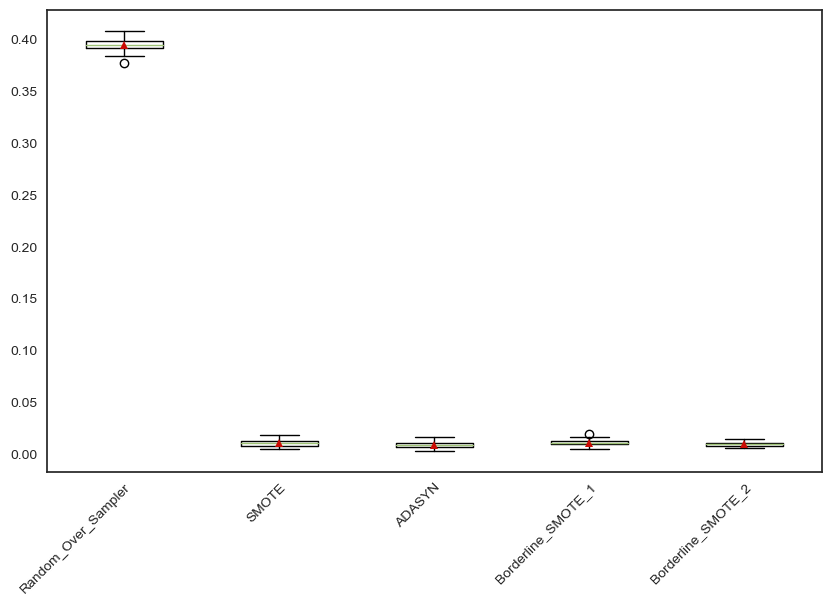

In [65]:
# plot the results
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(10, 6))

plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(fontsize=10, rotation=45, ha='right', rotation_mode='anchor')
plt.show()

La technique de l'Oversampling n'améliore pas les résultats de celle du "Cost-Sensitive Learning" pour le modèle de prédiction LightGBM.

# Optimisation du modèle sélectionné : LightGBM

Light Gradient Boosted Machine, ou LightGBM en abrégé, est une bibliothèque open source qui fournit une implémentation efficace et efficiente de l'algorithme d'amplification de gradient.

LightGBM étend l'algorithme d'amplification de gradient en ajoutant un type de sélection automatique de fonctionnalités et en se concentrant sur l'amplification d'exemples avec des gradients plus importants. Cela peut entraîner une accélération spectaculaire de la formation et une amélioration des performances prédictives.

L'amplification de gradient fait référence à une classe d'algorithmes d'apprentissage automatique d'ensemble qui peuvent être utilisés pour des problèmes de classification ou de modélisation prédictive de régression.

Les ensembles sont construits à partir de modèles d'arbre de décision. Les arbres sont ajoutés un par un à l'ensemble et ajustés pour corriger les erreurs de prédiction faites par les modèles antérieurs. Il s'agit d'un type de modèle d'apprentissage automatique d'ensemble appelé boosting.

Les modèles sont ajustés à l'aide de n'importe quelle fonction de perte différentiable arbitraire et d'un algorithme d'optimisation de descente de gradient. Cela donne à la technique son nom, "gradient boosting", car le gradient de perte est minimisé à mesure que le modèle est ajusté, un peu comme un réseau de neurones.

L'échantillonnage unilatéral basé sur le gradient, ou GOSS en abrégé, est une modification de la méthode d'amplification du gradient qui concentre l'attention sur les exemples d'entraînement qui entraînent un gradient plus important, accélérant ainsi l'apprentissage et réduisant la complexité de calcul de la méthode.

Le regroupement de fonctionnalités exclusives, ou EFB en abrégé, est une approche permettant de regrouper des fonctionnalités mutuellement exclusives clairsemées (principalement nulles), telles que des entrées de variables catégorielles qui ont été codées à chaud. En tant que tel, il s'agit d'un type de sélection automatique de fonctionnalités.

Ensemble, ces deux changements peuvent accélérer le temps de formation de l'algorithme jusqu'à 20 fois. En tant que tel, LightGBM peut être considéré comme des arbres de décision à amplification de gradient (GBDT) avec l'ajout de GOSS et EFB.

La bibliothèque LightGBM a sa propre API personnalisée, bien que nous utiliserons la méthode via les classes wrapper scikit-learn : LGBMRegressor et LGBMClassifier . Cela nous permettra d'utiliser la suite complète d'outils de la bibliothèque d'apprentissage automatique scikit-learn pour préparer les données et évaluer les modèles.

Les deux modèles fonctionnent de la même manière et prennent les mêmes arguments qui influencent la façon dont les arbres de décision sont créés et ajoutés à l'ensemble.

Le caractère aléatoire est utilisé dans la construction du modèle. Cela signifie que chaque fois que l'algorithme est exécuté sur les mêmes données, il produira un modèle légèrement différent.

Lorsqu'on utilise des algorithmes d'apprentissage automatique dotés d'un algorithme d'apprentissage stochastique, il est recommandé de les évaluer en faisant la moyenne de leurs performances sur plusieurs exécutions ou répétitions de validation croisée. Lors de l'ajustement d'un modèle final, il peut être souhaitable soit d'augmenter le nombre d'arbres jusqu'à ce que la variance du modèle soit réduite à travers des évaluations répétées, soit d'ajuster plusieurs modèles finaux et de faire la moyenne de leurs prédictions.

Il existe de nombreux hyperparamètres que nous pouvons examiner pour LightGBM, bien que dans ce cas, nous examinerons le nombre d'arbres et la profondeur des arbres, le taux d'apprentissage et le type de boosting.

## Exploration du nombre d'arbres

Un hyperparamètre important pour l'algorithme d'ensemble LightGBM est le nombre d'arbres de décision utilisés dans l'ensemble.

Rappelez-vous que les arbres de décision sont ajoutés au modèle de manière séquentielle dans le but de corriger et d'améliorer les prédictions faites par les arbres précédents. En tant que tel, plus d'arbres sont souvent meilleurs.

Le nombre d'arbres peut être défini via l'argument " n_estimators " et sa valeur par défaut est 100.

In [68]:
# get a list of models to evaluate
def get_models():
    models = dict()
    trees = [10, 50, 100, 200, 300, 400, 500, 1000]
    for n in trees:
        models[str(n)] = LGBMClassifier(n_estimators=n, class_weight="balanced")
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)
    scores = cross_val_score(model, X_train_sd, y_train, 
                             scoring="roc_auc", 
                             cv=cv, n_jobs=-2)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results

temps = time.time()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    # summarize and store
    print('> %s arbres : %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

duration=time.time()-temps
print(f"Temps d'exécution des calculs : {duration:>.2f} secondes")

> 10 arbres : 0.701 (0.007)
> 50 arbres : 0.725 (0.006)
> 100 arbres : 0.728 (0.006)
> 200 arbres : 0.727 (0.006)
> 300 arbres : 0.724 (0.006)
> 400 arbres : 0.721 (0.006)
> 500 arbres : 0.718 (0.006)
> 1000 arbres : 0.705 (0.007)
Temps d'exécution des calculs : 388.60 secondes


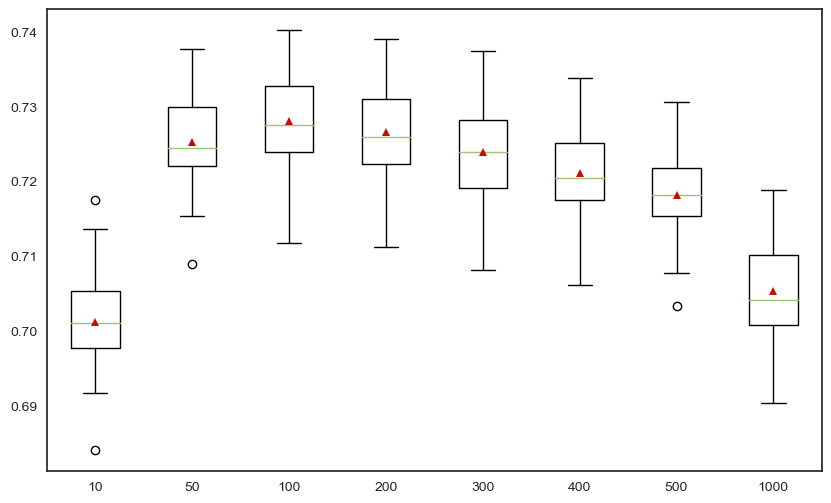

In [69]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(10, 6))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

Ce graphique rapporte le roc-auc (aire sous la courbe ROC) moyen pour chaque nombre d'arbres de décision configuré.
Dans ce cas, nous pouvons voir que les performances s'améliorent sur cet ensemble de données jusqu'à environ 100 arbres, après quoi les performances semblent se stabiliser puis décroître.

## Exploration de la profondeur des arbres

La variation de la profondeur de chaque arbre ajouté à l'ensemble est un autre hyperparamètre important pour l'amplification du gradient.

La profondeur de l'arbre contrôle le degré de spécialisation de chaque arbre par rapport à l'ensemble de données d'apprentissage : à quel point il peut être général ou surajusté. On préfère les arbres qui ne sont pas trop superficiels et généraux (comme AdaBoost) et pas trop profonds et spécialisés (comme bootstrap aggregation).

L'accentuation du gradient fonctionne généralement bien avec des arbres de profondeur modeste, trouvant un équilibre entre compétence et généralité.

La profondeur de l'arbre est contrôlée via l'argument " max_depth " et prend par défaut une valeur non spécifiée car le mécanisme par défaut pour contrôler la complexité des arbres consiste à utiliser le nombre de nœuds feuilles.

Il existe deux manières principales de contrôler la complexité des arbres : la profondeur maximale des arbres et le nombre maximal de nœuds terminaux (feuilles) dans l'arbre. Dans ce cas, nous explorons le nombre de feuilles, nous devons donc augmenter le nombre de feuilles pour prendre en charge des arbres plus profonds en définissant l'argument " num_leaves "

In [70]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,11):
        models[str(i)] = LGBMClassifier(max_depth=i, num_leaves=2**i,
                                        n_estimators=100, class_weight="balanced")
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)
    scores = cross_val_score(model, X_train_sd, y_train, 
                             scoring="roc_auc", 
                             cv=cv, n_jobs=-2)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results

temps = time.time()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    # summarize and store
    print('> Profondeur des arbres %s : %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

duration=time.time()-temps
print(f"Temps d'exécution des calculs : {duration:>.2f} secondes")

> Profondeur des arbres 1 : 0.703 (0.007)
> Profondeur des arbres 2 : 0.717 (0.006)
> Profondeur des arbres 3 : 0.724 (0.006)
> Profondeur des arbres 4 : 0.728 (0.006)
> Profondeur des arbres 5 : 0.728 (0.006)
> Profondeur des arbres 6 : 0.727 (0.006)
> Profondeur des arbres 7 : 0.723 (0.006)
> Profondeur des arbres 8 : 0.718 (0.006)
> Profondeur des arbres 9 : 0.711 (0.006)
> Profondeur des arbres 10 : 0.703 (0.007)
Temps d'exécution des calculs : 256.15 secondes


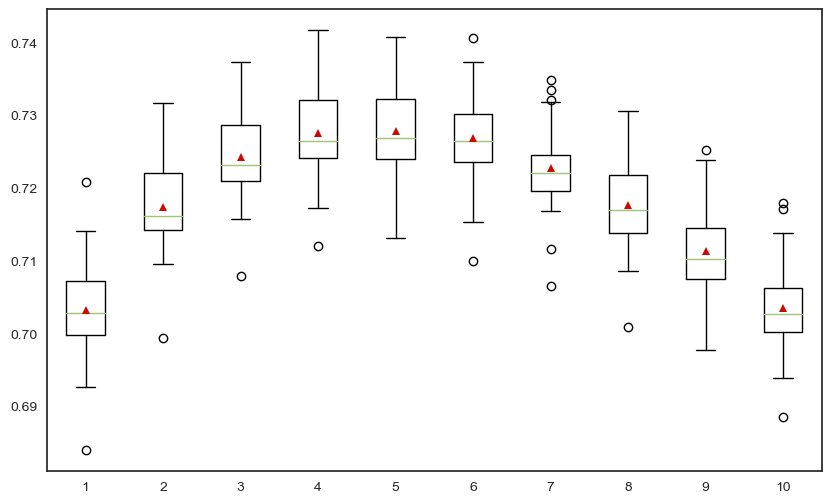

In [71]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(10, 6))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

Nous pouvons voir l'augmentation des performances du modèle avec la profondeur de l'arbre jusqu'à une profondeur de cinq niveaux, après quoi les performances décroissent.

## Exploration du taux d'apprentissage

Le taux d'apprentissage contrôle la quantité de contribution que chaque modèle a sur la prédiction d'ensemble.

Des taux plus faibles peuvent nécessiter plus d'arbres de décision dans l'ensemble.

Le taux d'apprentissage peut être contrôlé via l'argument « learning_rate » et sa valeur par défaut est 0,1.

L' exemple ci-dessous explore le taux d'apprentissage et compare l'effet des valeurs comprises entre 0,0001 et 1,0.

In [72]:
# get a list of models to evaluate
def get_models():
    models = dict()
    rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
    for r in rates:
        key = '%.4f' % r
        models[key] = LGBMClassifier(learning_rate=r,
                                     max_depth=5, num_leaves=2**5,
                                     n_estimators=100, class_weight="balanced")
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)
    scores = cross_val_score(model, X_train_sd, y_train, 
                             scoring="roc_auc", 
                             cv=cv, n_jobs=-2)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results

temps = time.time()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    # summarize and store
    print("> Taux d'apprentissage %s : %.3f (%.3f)" % (name, np.mean(scores), np.std(scores)))

duration=time.time()-temps
print(f"Temps d'exécution des calculs : {duration:>.2f} secondes")

> Taux d'apprentissage 0.0001 : 0.678 (0.007)
> Taux d'apprentissage 0.0010 : 0.685 (0.007)
> Taux d'apprentissage 0.0100 : 0.699 (0.007)
> Taux d'apprentissage 0.1000 : 0.728 (0.006)
> Taux d'apprentissage 1.0000 : 0.670 (0.008)
Temps d'exécution des calculs : 112.55 secondes


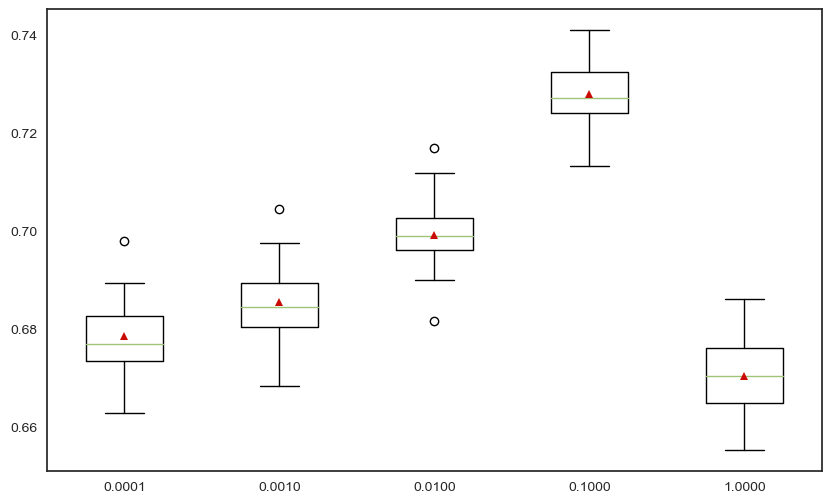

In [73]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(10, 6))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## Exploration du type de boost

Une caractéristique de LightGBM est qu'il prend en charge un certain nombre d'algorithmes de boosting différents, appelés types de boosting.

Le type de boosting peut être spécifié via l'argument " boosting_type " et prendre une chaîne pour spécifier le type. 

Les options incluent :
- "gbdt" : arbre de décision de renforcement de gradient (GDBT).
- "dart" : les abandons répondent aux arbres de régression additive multiple (DART).
- "goss" : échantillonnage unilatéral basé sur le gradient (GOSS).

La valeur par défaut est GDBT, qui est l'algorithme classique d'amplification de gradient.

DART est décrit dans l'article de 2015 intitulé « DART : les abandons rencontrent les arbres de régression additive multiple » et, comme son nom l'indique, ajoute le concept d' abandon de l'apprentissage en profondeur à l'algorithme des arbres de régression additive multiple (MART), un précurseur de la décision d'amplification du gradient.

GOSS a été introduit avec le papier et la bibliothèque LightGBM. L'approche cherche à n'utiliser que des instances qui entraînent un grand gradient d'erreur pour mettre à jour le modèle et supprimer le reste.

In [74]:
# get a list of models to evaluate
def get_models():
    models = dict()
    types = ['gbdt', 'dart', 'goss']
    for t in types:
        models[t] = LGBMClassifier(boosting_type=t,
                                   learning_rate=0.1,
                                   max_depth=5, num_leaves=2**5,
                                   n_estimators=100, class_weight="balanced")
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)
    scores = cross_val_score(model, X_train_sd, y_train, 
                             scoring="roc_auc", 
                             cv=cv, n_jobs=-2)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results

temps = time.time()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    # summarize and store
    print("> Type de boosting %s : %.3f (%.3f)" % (name, np.mean(scores), np.std(scores)))

duration=time.time()-temps
print(f"Temps d'exécution des calculs : {duration:>.2f} secondes")

> Type de boosting gbdt : 0.728 (0.006)
> Type de boosting dart : 0.721 (0.006)
> Type de boosting goss : 0.728 (0.006)
Temps d'exécution des calculs : 73.36 secondes


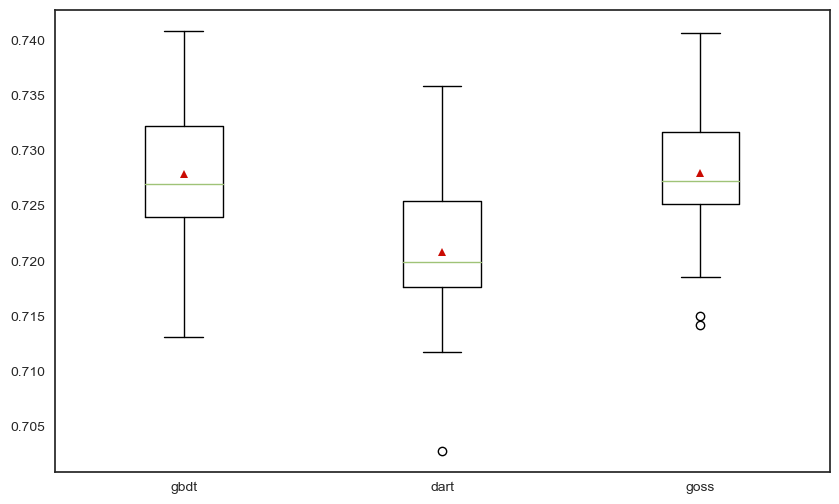

In [75]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(10, 6))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## Exploration des autres paramètres

Nous avons trois hyperparamètres pour la recherche de grille ici.

- `colsample_bytree` est le pourcentage de colonnes à échantillonner au hasard pour chaque arbre.
- `reg_alpha` fournit la régularisation l1 au poids pour réduire le surajustement. Des valeurs plus élevées donnent des modèles plus conservateurs.
- `reg_lambda` fournit une régularisation l2 au poids. Des valeurs plus élevées donnent des modèles plus conservateurs.

In [76]:
model_LGBM = LGBMClassifier(boosting_type='gbdt',
                            learning_rate=0.1,
                            max_depth=5, num_leaves=2**5,
                            n_estimators=100, 
                            objective='binary',
                            class_weight="balanced",
                            random_state=101,
                            n_jobs=-2,)

model_LGBM.fit(X_train_sd, y_train)

LGBMClassifier(class_weight='balanced', max_depth=5, n_jobs=-2, num_leaves=32,
               objective='binary', random_state=101)

In [77]:
from pprint import pprint

print('Paramètres LightGMB Classifier :\n')
pprint(model_LGBM.get_params())

Paramètres LightGMB Classifier :

{'boosting_type': 'gbdt',
 'class_weight': 'balanced',
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -2,
 'num_leaves': 32,
 'objective': 'binary',
 'random_state': 101,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}


In [78]:
import time
temps1=time.time()

# Define the search space
param_grid = { 
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [0, 0.5, 1, 5],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [0, 0.5, 1, 5]
    }

# Set up the k-fold cross-validation
kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)

# Define grid search
grid_search = GridSearchCV(estimator=model_LGBM, 
                           param_grid=param_grid, 
                           n_jobs=-2, 
                           cv=kfold, 
                           scoring="roc_auc",
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train_sd, y_train)

# Print the best score and the corresponding hyperparameters
print(f'The best score is {grid_result.best_score_:.4f}')
print('The best score standard deviation is', round(grid_result.cv_results_['std_test_score'][grid_result.best_index_], 4))
print(f'The best hyperparameters are {grid_result.best_params_}')

duration1=time.time()-temps1
print("temps de la recherche des hyper-paramètres : ", "%15.2f" % duration1, "secondes")

The best score is 0.7287
The best score standard deviation is 0.0064
The best hyperparameters are {'colsample_bytree': 0.8, 'reg_alpha': 5, 'reg_lambda': 0.5}
temps de la recherche des hyper-paramètres :           908.90 secondes


# Analyse de la performance du modèle

In [79]:
import lightgbm
from lightgbm import LGBMClassifier


from sklearn.metrics import (classification_report,
                             precision_score,
                             recall_score,
                             f1_score,
                             precision_recall_fscore_support,
                             fbeta_score, 
                             make_scorer)

from yellowbrick.classifier import ClassificationReport, DiscriminationThreshold


In [80]:
model_LGBM = LGBMClassifier(boosting_type='gbdt',
                            learning_rate=0.1,
                            max_depth=5, 
                            num_leaves=2**5,
                            n_estimators=100, 
                            objective='binary',
                            class_weight="balanced",
                            colsample_bytree=0.8,
                            reg_alpha=5, 
                            reg_lambda=0.5,                            
                            random_state=101,
                            n_jobs=-2,)

model_LGBM_fit = model_LGBM.fit(X_train_sd, y_train)

# Make predictions
y_pred_lgbm = model_LGBM_fit.predict(X_valid_sd)

y_pred_lgbm_proba = model_LGBM_fit.predict_proba(X_valid_sd)

In [81]:
print(classification_report(y_valid, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     84806
           1       0.15      0.65      0.25      7448

    accuracy                           0.69     92254
   macro avg       0.56      0.67      0.53     92254
weighted avg       0.89      0.69      0.76     92254



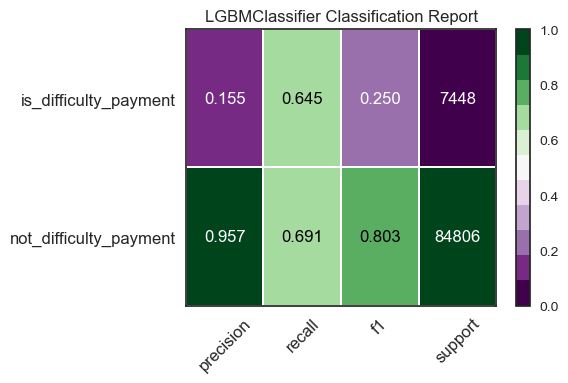

<AxesSubplot: title={'center': 'LGBMClassifier Classification Report'}>

In [82]:
# Identifying classes. The classes variable will be useful when using Yellowbrick's visualizers
classes = ['not_difficulty_payment', 'is_difficulty_payment']

sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(6, 4))

visualizer = ClassificationReport(model_LGBM_fit, classes=classes, support=True, cmap='PRGn')

visualizer.fit(X_train_sd, y_train)        # Fit the visualizer and the model
visualizer.score(X_valid_sd, y_valid)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [83]:
print(f"Train Accuracy : {accuracy_score(y_train, model_LGBM_fit.predict(X_train_sd)):.2%}")
print(f"Test Accuracy : {accuracy_score(y_valid, y_pred_lgbm):.2%}")

Train Accuracy : 69.45%
Test Accuracy : 68.74%


In [84]:
print(f"Train Precision : {precision_score(y_train, model_LGBM_fit.predict(X_train_sd)):.2%}")
print(f"Test Precision : {precision_score(y_valid, y_pred_lgbm):.2%}")

Train Precision : 16.65%
Test Precision : 15.50%


In [85]:
print(f"Train Recall : {recall_score(y_train, model_LGBM_fit.predict(X_train_sd)):.2%}")
print(f"Test Recall : {recall_score(y_valid, y_pred_lgbm):.2%}")

Train Recall : 69.51%
Test Recall : 64.50%


In [86]:
print(f"Train f1_score : {f1_score(y_train, model_LGBM_fit.predict(X_train_sd)):.2%}")
print(f"Test f1_score : {f1_score(y_valid, y_pred_lgbm):.2%}")

Train f1_score : 26.87%
Test f1_score : 24.99%


In [87]:
print(f"Train f2_score : {fbeta_score(y_train, model_LGBM_fit.predict(X_train_sd), beta=2):.2%}")
print(f"Test f2_score : {fbeta_score(y_valid, y_pred_lgbm, beta=2):.2%}")

Train f2_score : 42.52%
Test f2_score : 39.52%


De manière générale, le **seuil de discrimination** (probabilité à laquelle on choisit la classe positive plutôt que la négative) est équilibré entre les cas et fixé à 0,5 ou 50 % de probabilité. Cependant, ce seuil peut ne pas être le seuil optimal : il existe souvent une relation inverse entre précision et rappel par rapport à un seuil de discrimination. En ajustant le seuil du classificateur, il est possible d'ajuster le score F1 (la moyenne harmonique de précision et de rappel) au meilleur ajustement possible ou d'ajuster le classificateur pour qu'il se comporte de manière optimale pour l'application spécifique. 

Les classificateurs sont réglés en tenant compte des métriques suivantes :

- *Précision* : Une augmentation de la précision est une réduction du nombre de faux positifs ; cette métrique doit être optimisée lorsque le coût du traitement spécial est élevé (par exemple, perte de temps dans la prévention de la fraude ou manquement d'un e-mail important).

- *Rappel* : une augmentation du rappel diminue la probabilité que la classe positive soit manquée ; cette métrique doit être optimisée lorsqu'il est vital d'attraper le cas même au prix de plus de faux positifs.

- *Score F1* : Le score F1 est la moyenne harmonique entre la précision et le rappel. Le fbeta paramètre détermine le poids relatif de la précision et du rappel lors du calcul de cette métrique, défini par défaut sur 1 ou F1. L'optimisation de cette métrique produit le meilleur équilibre entre précision et rappel.

- *Queue rate* : La "file d'attente" est le dossier spam ou la boîte de réception du bureau d'enquête sur les fraudes. Cette métrique décrit le pourcentage d'instances qui doivent être examinées. Si l'examen a un coût élevé (par exemple, la prévention de la fraude), celui-ci doit être minimisé par rapport aux exigences commerciales ; si ce n'est pas le cas (par exemple, filtre anti-spam), cela pourrait être optimisé pour garantir que la boîte de réception reste propre

Le visualiseur est destiné à aider les utilisateurs à déterminer un seuil approprié pour la prise de décision (par exemple, à quel seuil avons-nous un examen humain des données), compte tenu d'une tolérance pour la précision et le rappel ou la limitation du nombre d'enregistrements à vérifier (le taux de file d'attente)

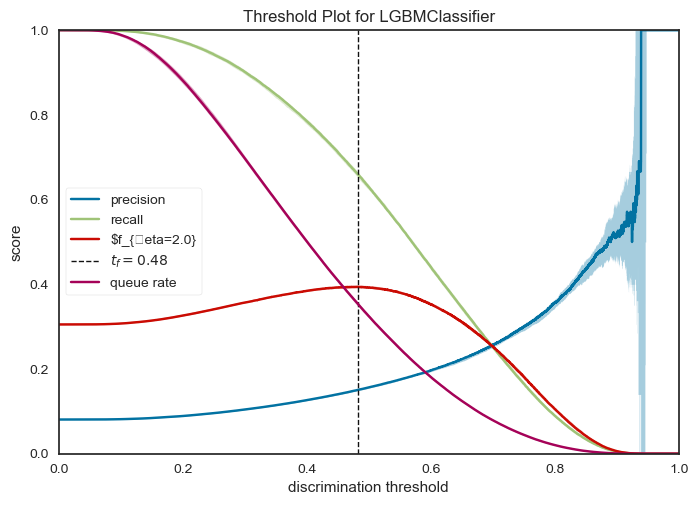

<AxesSubplot: title={'center': 'Threshold Plot for LGBMClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [88]:
visualizer = DiscriminationThreshold(model_LGBM,
                                     n_trials=50,
                                     cv=0.5,
                                     fbeta = 2.0,
                                     argmax='fscore',
                                     random_state=101,
                                     is_fitted='auto')

visualizer.fit(X_train_sd, y_train)        # Fit the visualizer and the model
visualizer.score(X_valid_sd, y_valid)        # Evaluate the model on the test data
visualizer.show()  

Dans la figure ci-dessus, nous voyons le visualiseur réglé pour rechercher le F2 score optimal, qui est annoté comme un seuil de 0,48. Le modèle est exécuté plusieurs fois sur plusieurs divisions train/test afin de tenir compte de la variabilité du modèle par rapport aux métriques (représentées par la zone de remplissage autour de la courbe médiane).

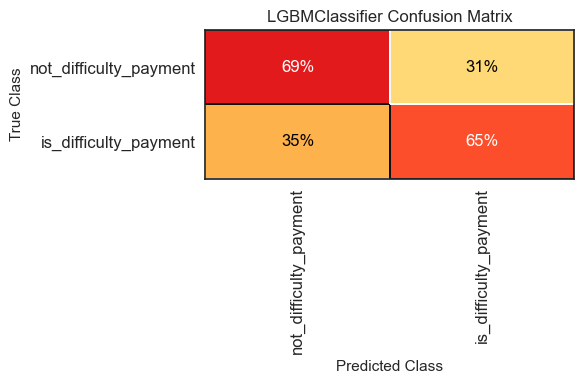

<AxesSubplot: title={'center': 'LGBMClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [89]:
from yellowbrick.classifier import ConfusionMatrix

sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(6, 4))

cm = ConfusionMatrix(model_LGBM_fit, classes=classes, percent=True)

cm.fit(X_train_sd, y_train)        # Fit the visualizer and the model
cm.score(X_valid_sd, y_valid)        # Evaluate the model on the test data
cm.show()

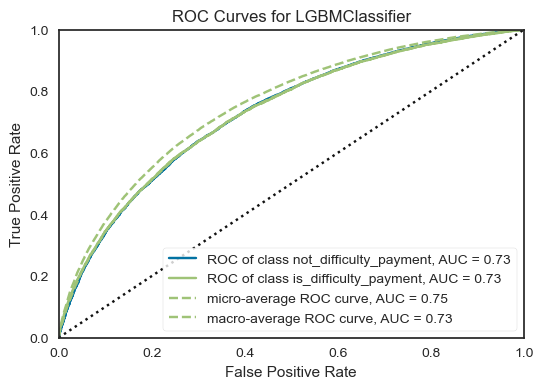

<AxesSubplot: title={'center': 'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [90]:
from yellowbrick.classifier import ROCAUC

sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(6, 4))

vis_rocauc = ROCAUC(model_LGBM_fit, classes=classes, random_state=101)

vis_rocauc.fit(X_train_sd, y_train)        
vis_rocauc.score(X_valid_sd, y_valid)
vis_rocauc.show()                       

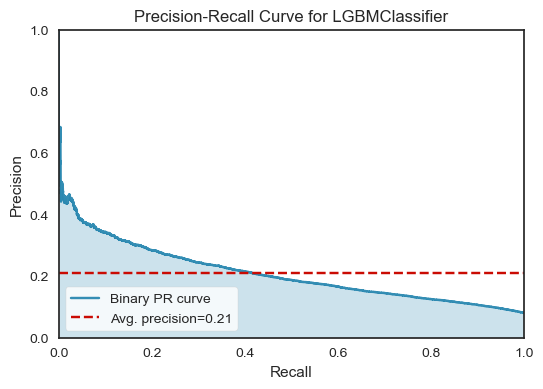

<AxesSubplot: title={'center': 'Precision-Recall Curve for LGBMClassifier'}, xlabel='Recall', ylabel='Precision'>

In [91]:
from yellowbrick.classifier import PrecisionRecallCurve

sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(6, 4))

vis_prc = PrecisionRecallCurve(model_LGBM_fit, random_state=101)

vis_prc.fit(X_train_sd, y_train)        # Fit the visualizer and the model
vis_prc.score(X_valid_sd, y_valid)        # Evaluate the model on the test data
vis_prc.show()  